In [1]:
import boto3
import pandas as pd
import sagemaker
import matplotlib.pyplot as plt

s3_client = boto3.client("s3")

BUCKET = 'ads-508-team2'
KEY_ONE = 'cardio_train.csv'
KEY_TWO = 'healthcare-dataset-stroke-data.csv'
KEY_THREE = 'heart_disease_health_indicators_BRFSS2015.csv'

response_one = s3_client.get_object(Bucket = BUCKET, Key = KEY_ONE)
response_two = s3_client.get_object(Bucket = BUCKET, Key = KEY_TWO)
response_three = s3_client.get_object(Bucket = BUCKET, Key = KEY_THREE)

cardio_df = pd.read_csv(response_one.get("Body"), sep = ';')
stroke_df = pd.read_csv(response_two.get("Body"))
heart_df = pd.read_csv(response_three.get("Body"))



### Cardiovascular Disease Dataset

In [2]:
# Looking at the data features
cardio_df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


Looking at the initial data, we can see that one problem is that age is in days which will be converted now to make the data usable.

In [3]:
def days_to_years(x):
    return x / 365
cardio_df['age'] = cardio_df['age'].transform(days_to_years)
cardio_df['age'] = cardio_df['age'].astype(int)
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Looking at the data distribution
cardio_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print(cardio_df.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [6]:
# Finding null values
print(cardio_df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


(array([35021.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 34979.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

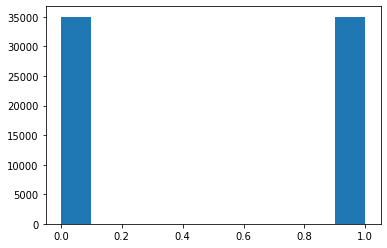

In [7]:
plt.hist(cardio_df.cardio)

Cardiovascular disease is equally distributed getween true and false.

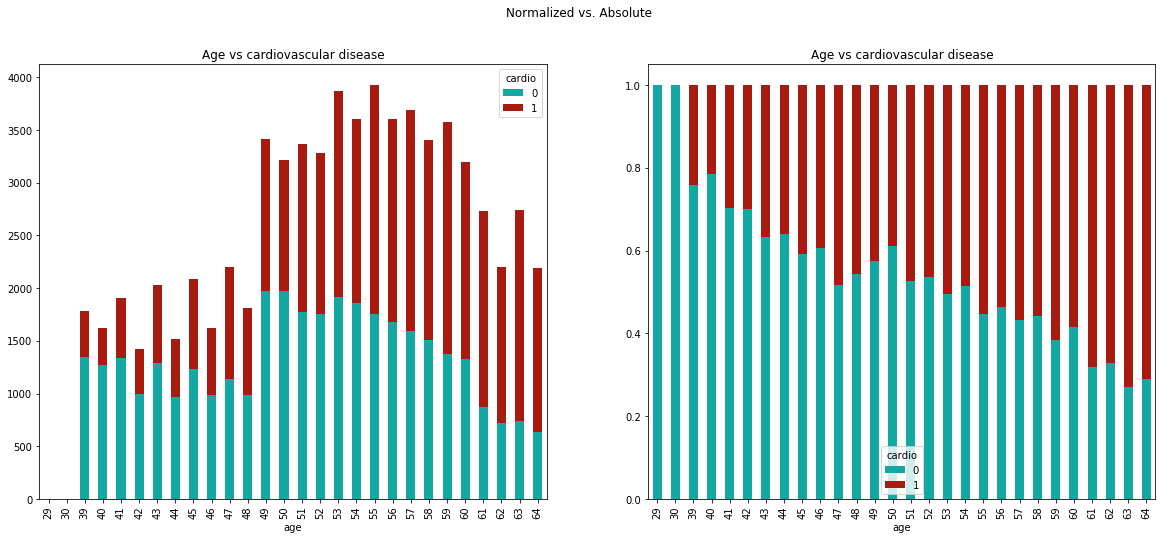

In [8]:
# Plotting age vs cardiovascular disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(cardio_df.age, cardio_df.cardio)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Age vs cardiovascular disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Age vs cardiovascular disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Age is close to normally distributed, but only goes from 39-64 with a few 29 and 30-year-olds. Higher age is correlated with cardiovascular disease.

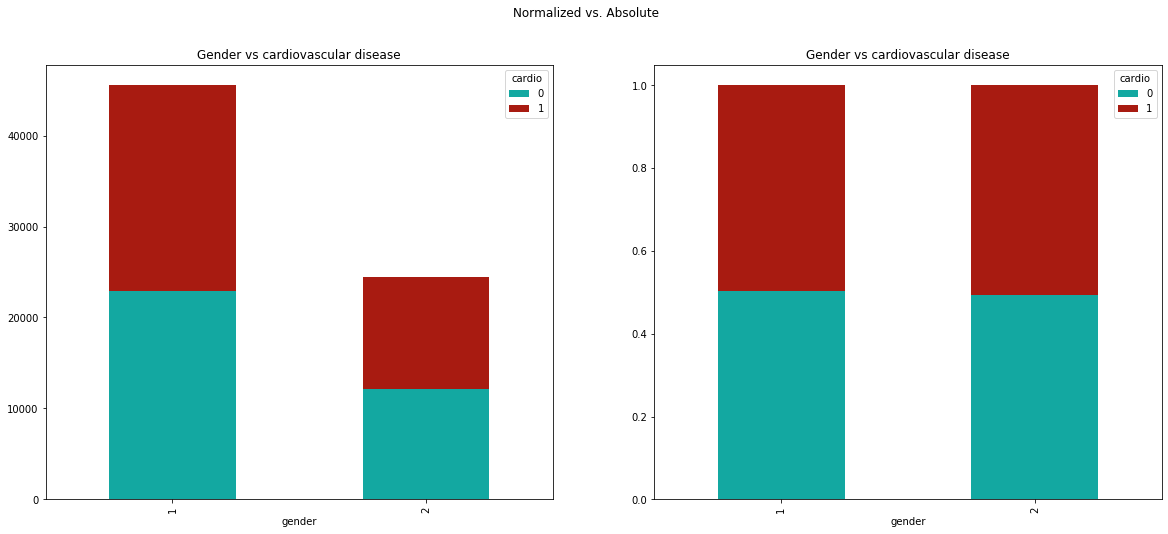

In [9]:
# Plotting gender vs cardiovascular disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(cardio_df.gender, cardio_df.cardio)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Gender vs cardiovascular disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Gender vs cardiovascular disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Most respondents were female, but gender does not seem correlated with cardiovascular disease.

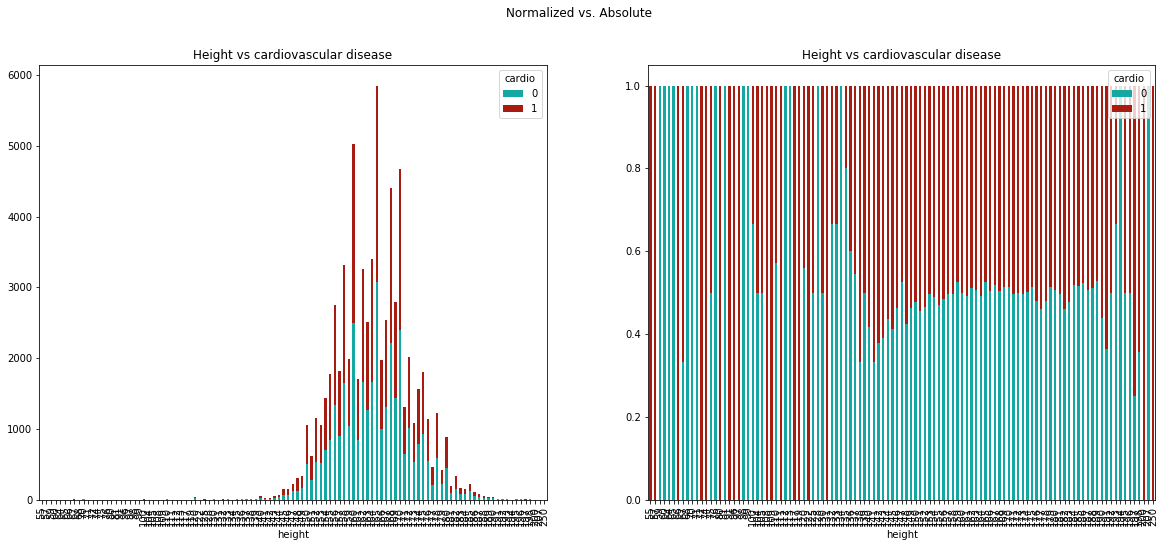

In [10]:
# Plotting height vs cardiovascular disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(cardio_df.height, cardio_df.cardio)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Height vs cardiovascular disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Height vs cardiovascular disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Height is normally distributed, with some correlation for higher and lower heights and cardiovascular disease.

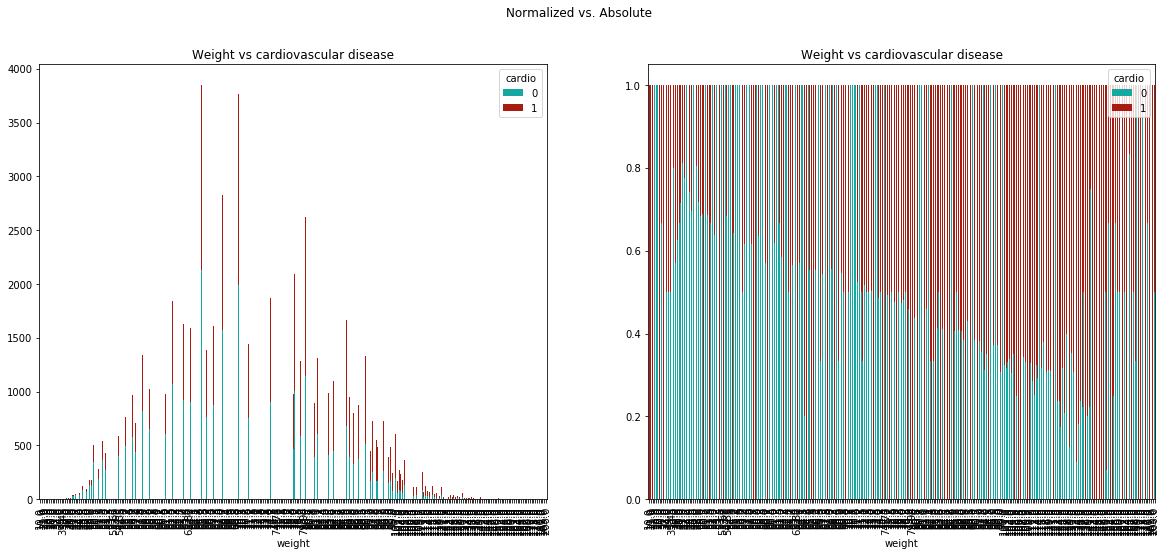

In [11]:
# Plotting weight vs cardiovascular disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(cardio_df.weight, cardio_df.cardio)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Weight vs cardiovascular disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Weight vs cardiovascular disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Weight is normally distributed with higher weights correlated with cardiovascular disease.

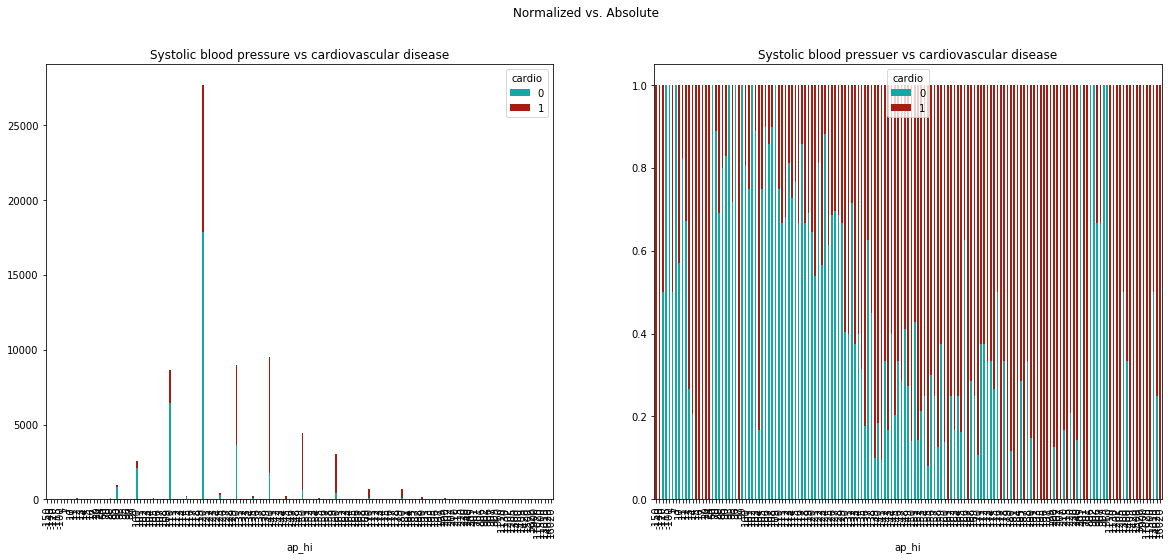

In [12]:
# Plotting ap hi vs cardiovascular disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(cardio_df.ap_hi, cardio_df.cardio)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Systolic blood pressure vs cardiovascular disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Systolic blood pressuer vs cardiovascular disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Systolic blood pressure is normally distributed, with low and high systolic blood pressure having some correlation with cardiovascular disease.

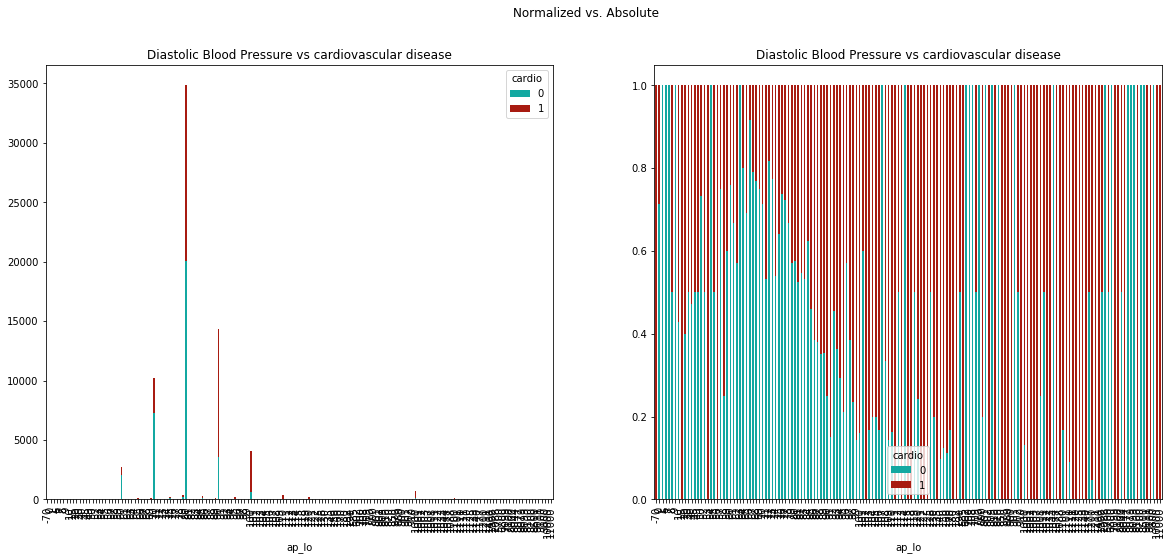

In [13]:
# Plotting ap lo vs cardiovascular disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(cardio_df.ap_lo, cardio_df.cardio)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Diastolic Blood Pressure vs cardiovascular disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Diastolic Blood Pressure vs cardiovascular disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Diastolic blood pressure seems normally distributed, with higher diastolic blood pressure or very low diastolic blood pressure being correlated with cardiovascular disease.

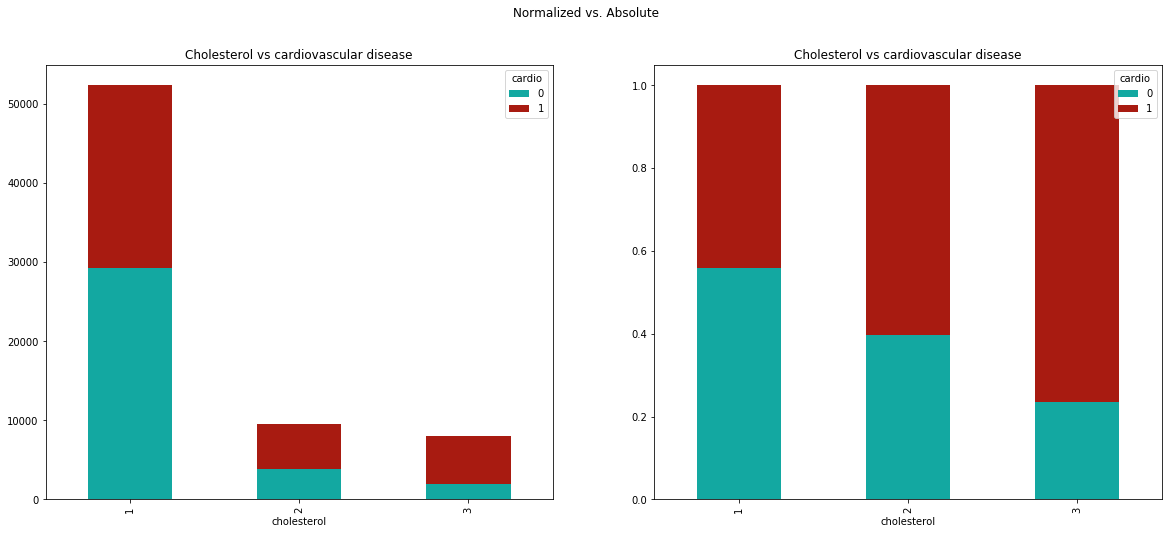

In [14]:
# Plotting cholesterol vs cardiovascular disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(cardio_df.cholesterol, cardio_df.cardio)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Cholesterol vs cardiovascular disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Cholesterol vs cardiovascular disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Most people did not have high cholesterol, but those in level 2 and 3 did have a higher correlation with cardiovascular disease.

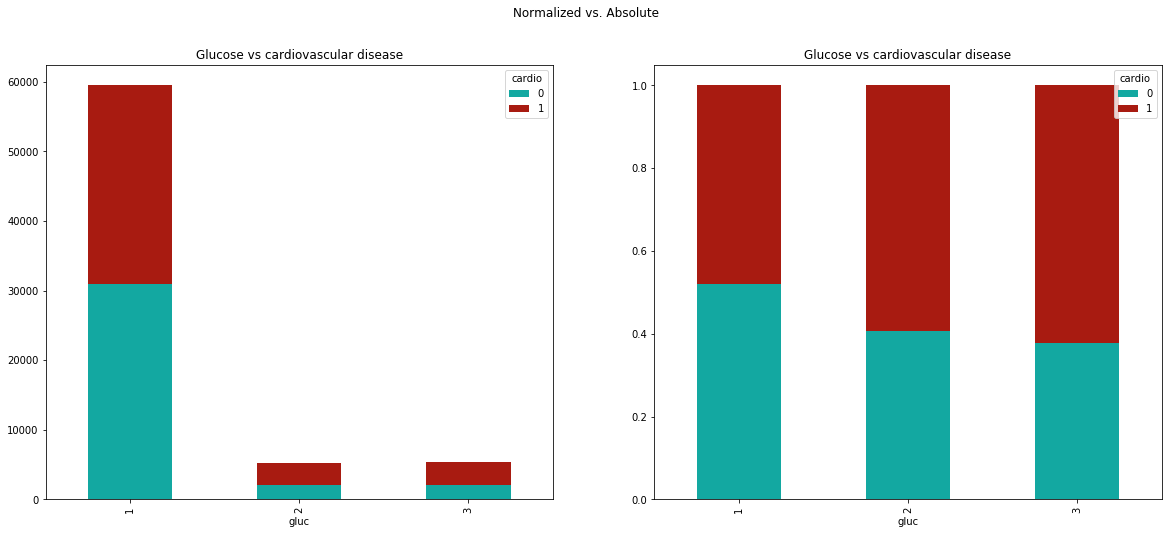

In [15]:
# Plotting glucose vs cardiovascular disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(cardio_df.gluc, cardio_df.cardio)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Glucose vs cardiovascular disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Glucose vs cardiovascular disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Most people had glucose of level 1, and glucose levels 2 and 3 did seem mildly correlated with cardiovascular disease.

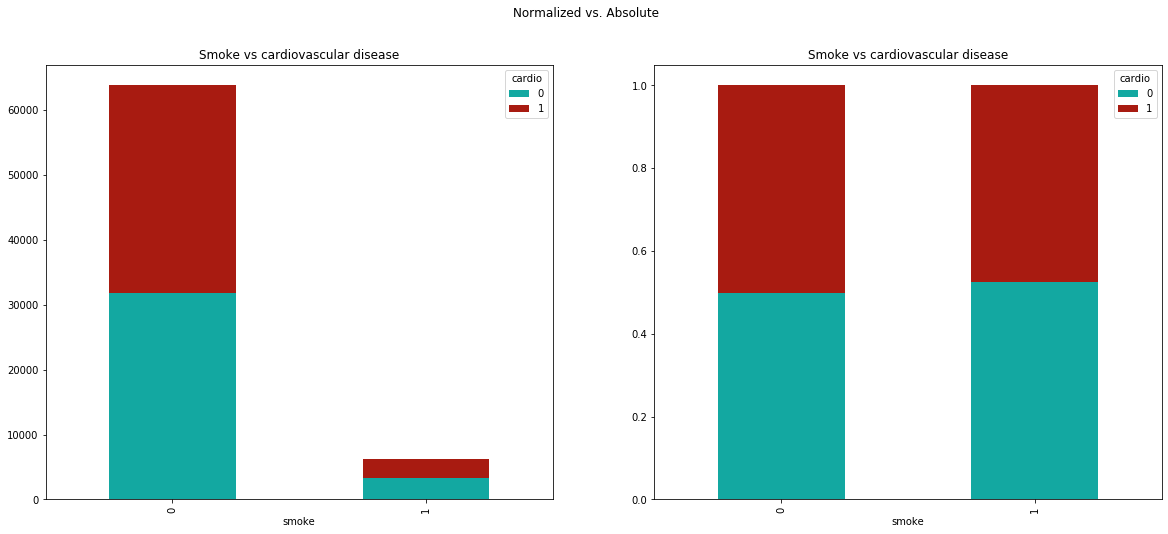

In [16]:
# Plotting smoke vs cardiovascular disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(cardio_df.smoke, cardio_df.cardio)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Smoke vs cardiovascular disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Smoke vs cardiovascular disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Most respondents were non-smokers and it does not seem correlated with cardiovascular disease.

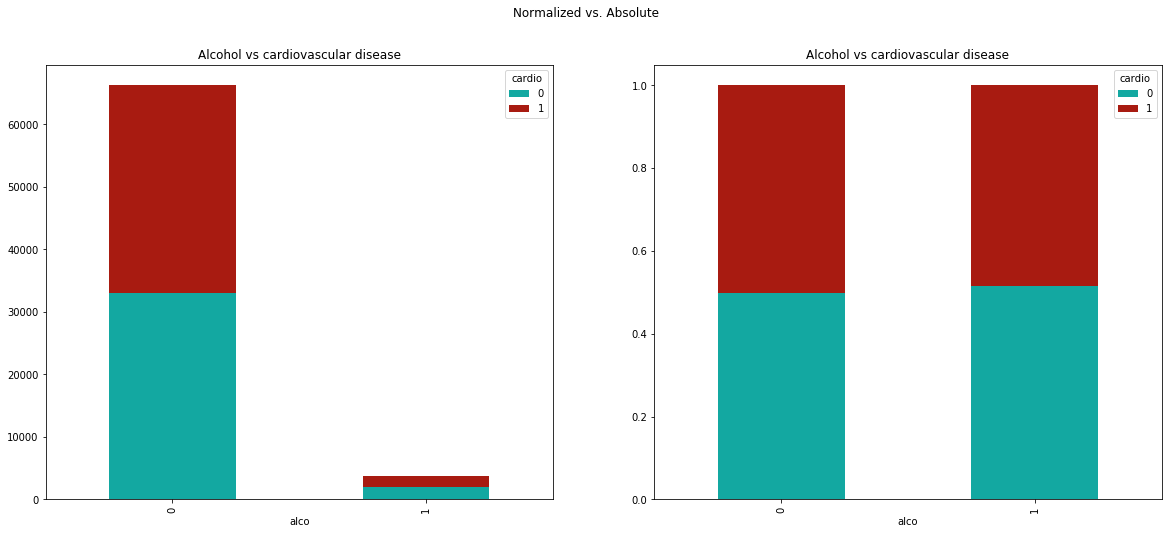

In [17]:
# Plotting glucose vs cardiovascular disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(cardio_df.alco, cardio_df.cardio)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Alcohol vs cardiovascular disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Alcohol vs cardiovascular disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Most respondents reported insignificant alcohol consumption, but it doesn't appear correlated with cardiovascular disease.

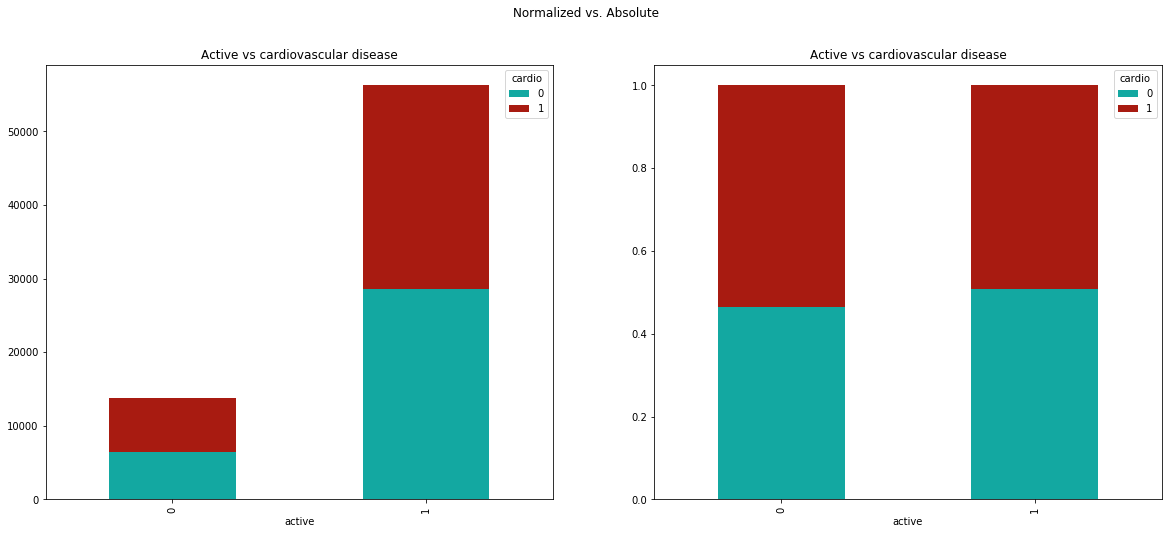

In [18]:
# Plotting active vs cardiovascular disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(cardio_df.active, cardio_df.cardio)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Active vs cardiovascular disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Active vs cardiovascular disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Most respondents were active, but it does not seem correlated with cardiovascular disease.

In [19]:
cardio_df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003814,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003814,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,0.003502,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


The features most highly correlated with cardiovascular disease are: age, weight, and cholesterol.

In [20]:
from smclarify.bias import report
# Calculating bias

facet_column = report.FacetColumn(name="cholesterol")

label_column = report.LabelColumn(
    name="cardio", 
    data=cardio_df["cardio"], 
    positive_label_values=[1]
)

report.bias_report(
    df=cardio_df, 
    facet_column=facet_column, 
    label_column=label_column, 
    stage_type=report.StageType.PRE_TRAINING, 
    metrics=["CI", "DPL", "KL", "JS", "LP", "TVD", "KS"]
)

[{'value_or_threshold': '1',
  'metrics': [{'name': 'CI',
    'description': 'Class Imbalance (CI)',
    'value': -0.4967142857142857},
   {'name': 'DPL',
    'description': 'Difference in Positive Proportions in Labels (DPL)',
    'value': 0.23681617609268657},
   {'name': 'JS',
    'description': 'Jensen-Shannon Divergence (JS)',
    'value': 0.02872215704938657},
   {'name': 'KL',
    'description': 'Kullback-Liebler Divergence (KL)',
    'value': 0.11379685556832794},
   {'name': 'KS',
    'description': 'Kolmogorov-Smirnov Distance (KS)',
    'value': 0.23681617609268657},
   {'name': 'LP', 'description': 'L-p Norm (LP)', 'value': 0.3349086480196124},
   {'name': 'TVD',
    'description': 'Total Variation Distance (TVD)',
    'value': 0.23681617609268654}]},
 {'value_or_threshold': '3',
  'metrics': [{'name': 'CI',
    'description': 'Class Imbalance (CI)',
    'value': 0.7695428571428572},
   {'name': 'DPL',
    'description': 'Difference in Positive Proportions in Labels (DPL)',

Correlated features will need to be balanced prior to training.

### Stroke Prediction Dataset

In [21]:
# Looking at the data features
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


There are 10 features and the target is 'stroke'.

In [22]:
# Looking at the data distribution
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The data contains 5,110 rows.

In [23]:
print(stroke_df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [24]:
# Finding null values
print(stroke_df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


BMI is the only feature with missing values, and is missing 3.93% of the values.

(array([4861.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         249.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

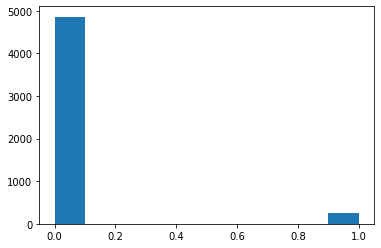

In [25]:
plt.hist(stroke_df.stroke)

The data is highly skewed with stroke = 1 being much smaller than stroke = 0.

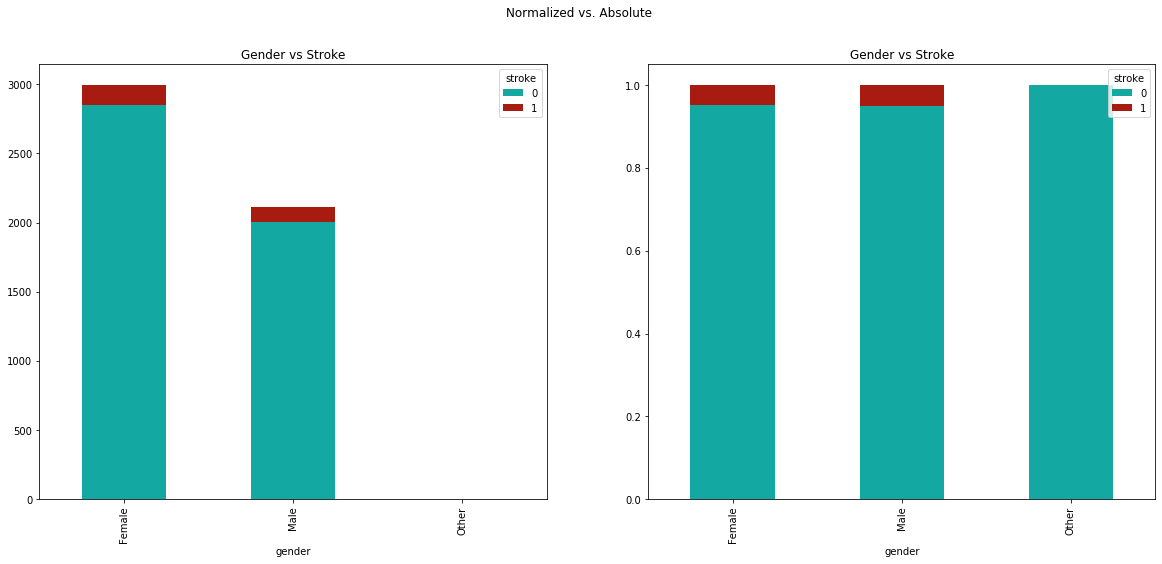

In [26]:
# Plotting gender vs stroke

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(stroke_df.gender, stroke_df.stroke)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Gender vs Stroke', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Gender vs Stroke', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

There are more female than male respondents, but it does not seem correlated with stroke.

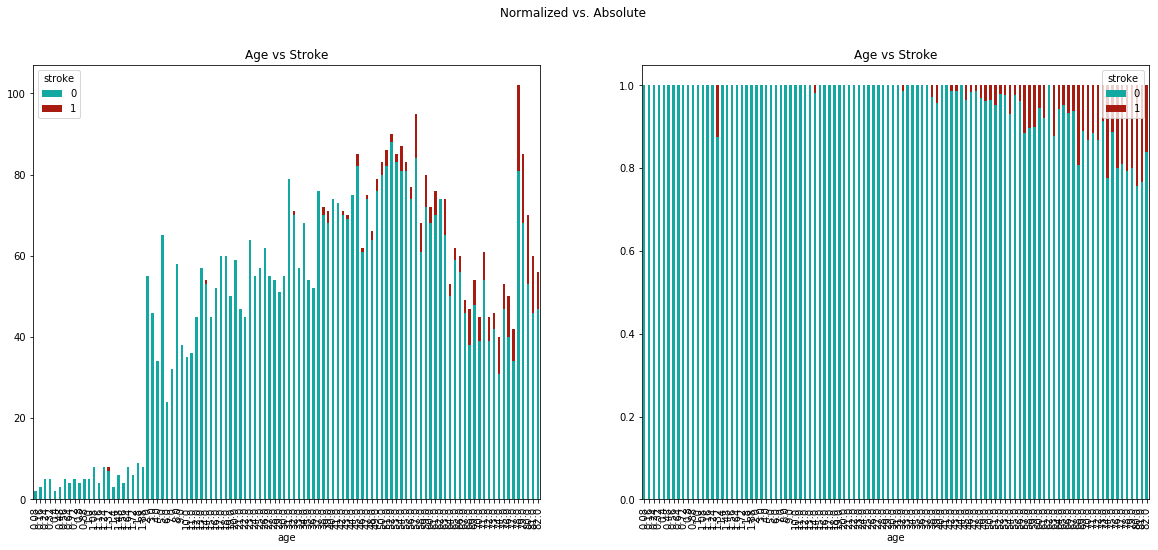

In [27]:
# Plotting age vs stroke

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(stroke_df.age, stroke_df.stroke)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Age vs Stroke', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Age vs Stroke', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Age is predominantly middle-aged, and higher ages are correlated with higher likelihood of stroke.

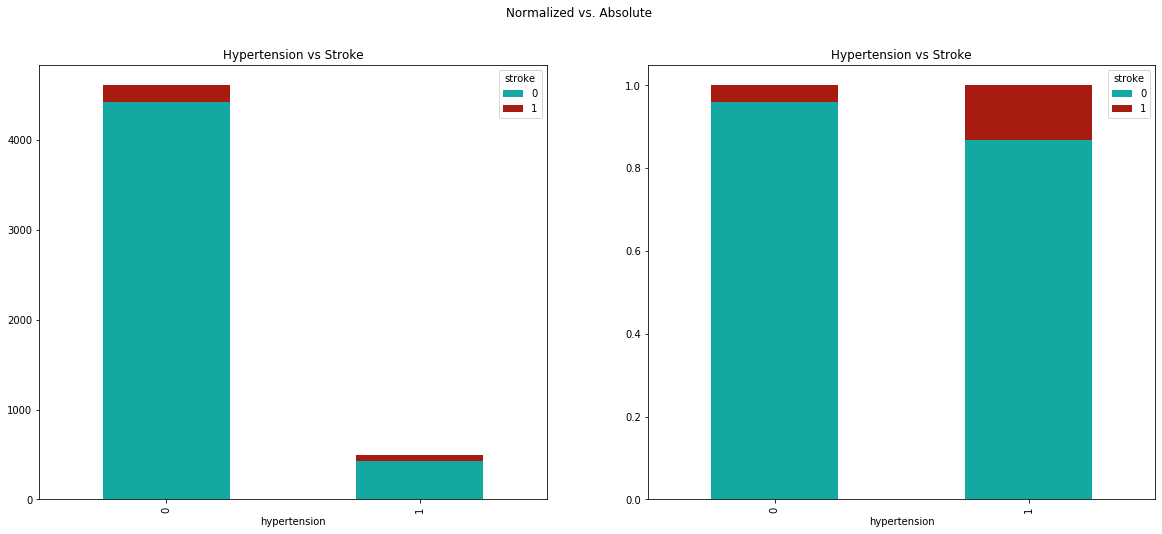

In [28]:
# Plotting hypertension vs stroke

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(stroke_df.hypertension, stroke_df.stroke)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Hypertension vs Stroke', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Hypertension vs Stroke', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Most do not have hypertension, but hypertension does seem correlated with stroke.

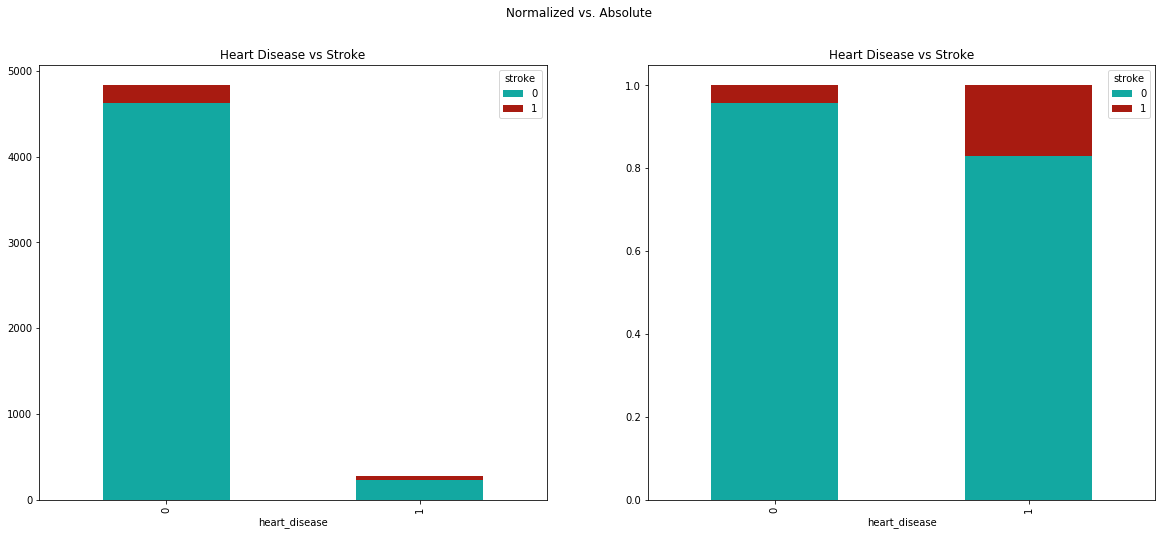

In [29]:
# Plotting heart disease vs stroke

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(stroke_df.heart_disease, stroke_df.stroke)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Heart Disease vs Stroke', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Heart Disease vs Stroke', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

The majority of responses do not have heart disease, but it is correlated with stroke. 

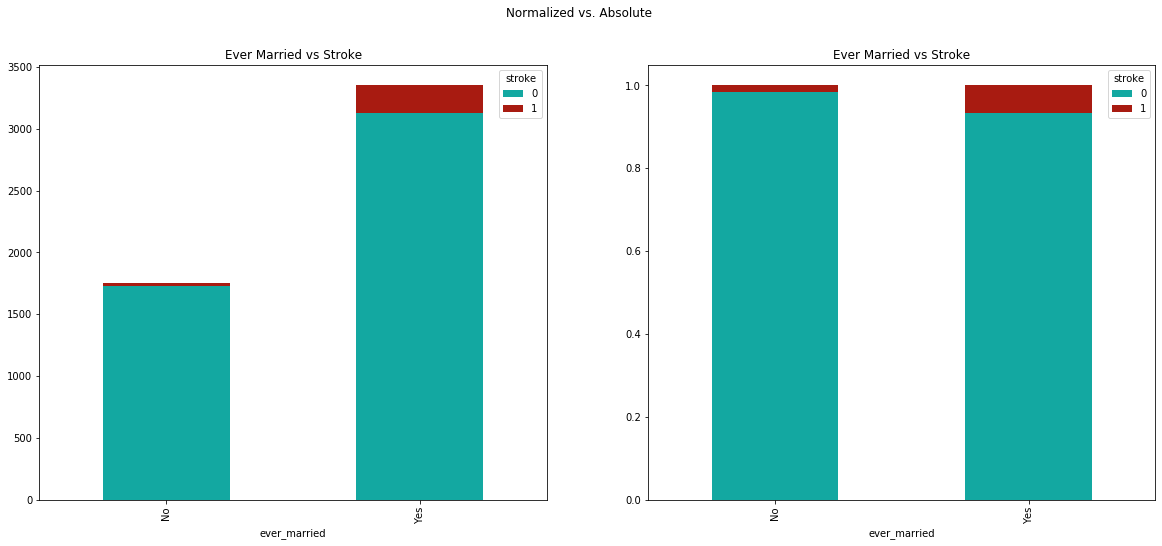

In [30]:
# Plotting marriage vs stroke

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(stroke_df.ever_married, stroke_df.stroke)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Ever Married vs Stroke', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Ever Married vs Stroke', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Most responses were that people have been married before, and seems very mildly correlated to likelihood of stroke, but this could also be because people who have been married are likely to be older, which is a risk factor.

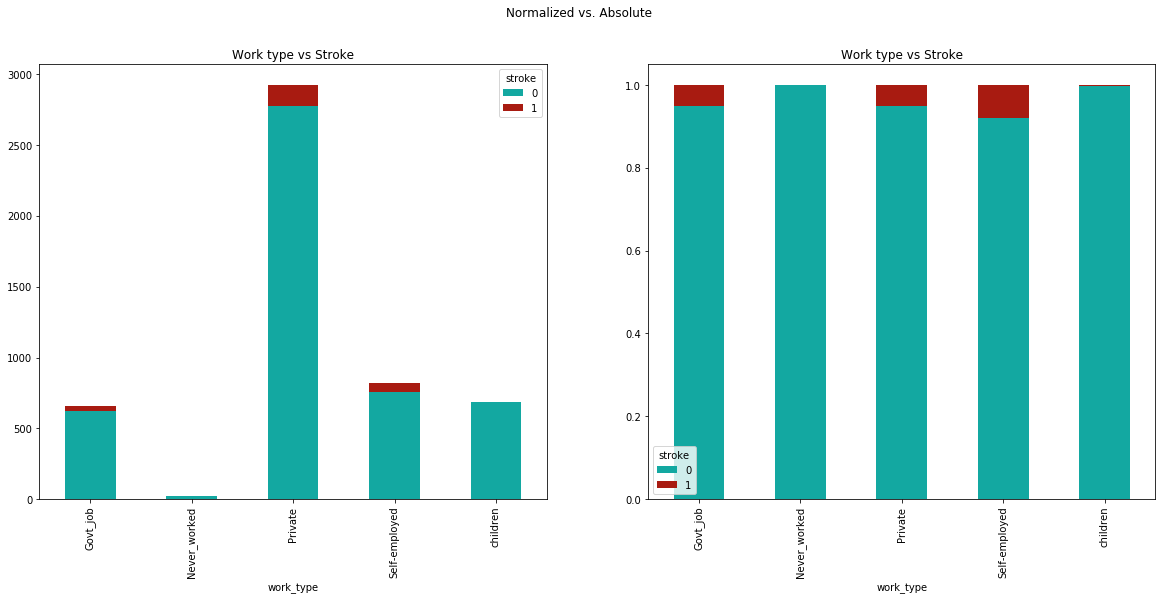

In [31]:
# Plotting work type vs stroke

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(stroke_df.work_type, stroke_df.stroke)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Work type vs Stroke', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Work type vs Stroke', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Work type is predominantly private, with governement job, self-employed, and children having similar amounts of responsenses. There isn't strong correlation between work type and stroke, which could also be because of the category types being very vague.

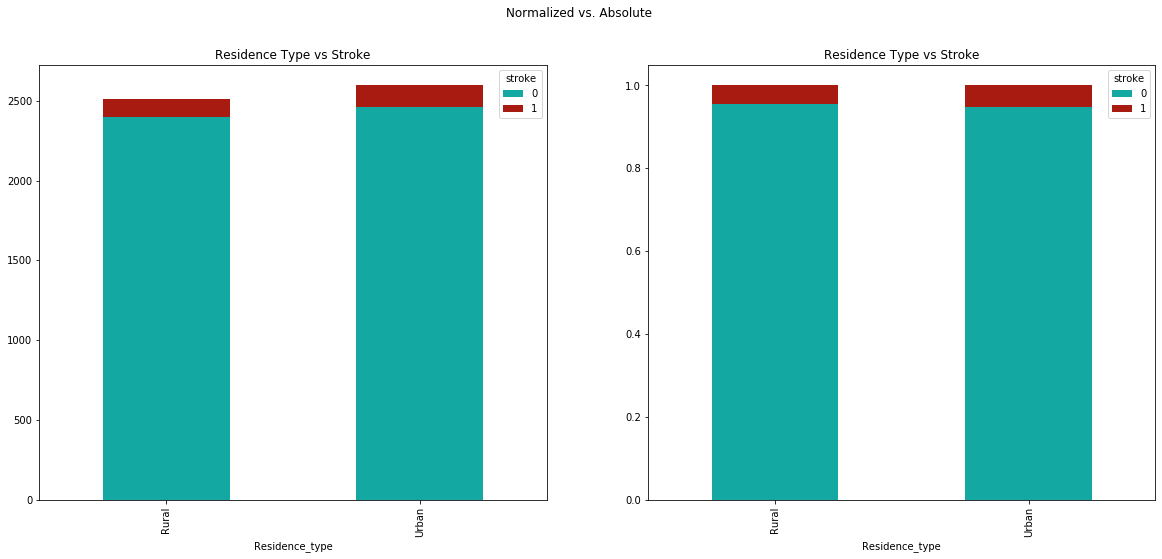

In [32]:
# Plotting residence vs stroke

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(stroke_df.Residence_type, stroke_df.stroke)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Residence Type vs Stroke', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Residence Type vs Stroke', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Residence is split relatively evenly, and does not seem to correlate with stroke.

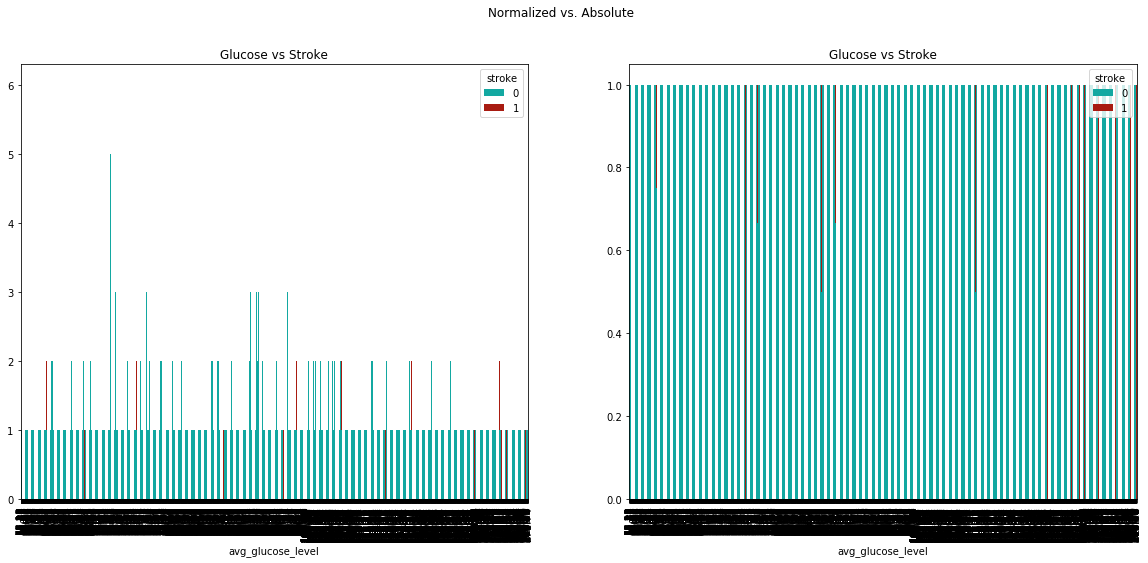

In [33]:
# Plotting glucose vs stroke

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(stroke_df.avg_glucose_level, stroke_df.stroke)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Glucose vs Stroke', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Glucose vs Stroke', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Higher glucose seems to have a higher correlation with stroke.

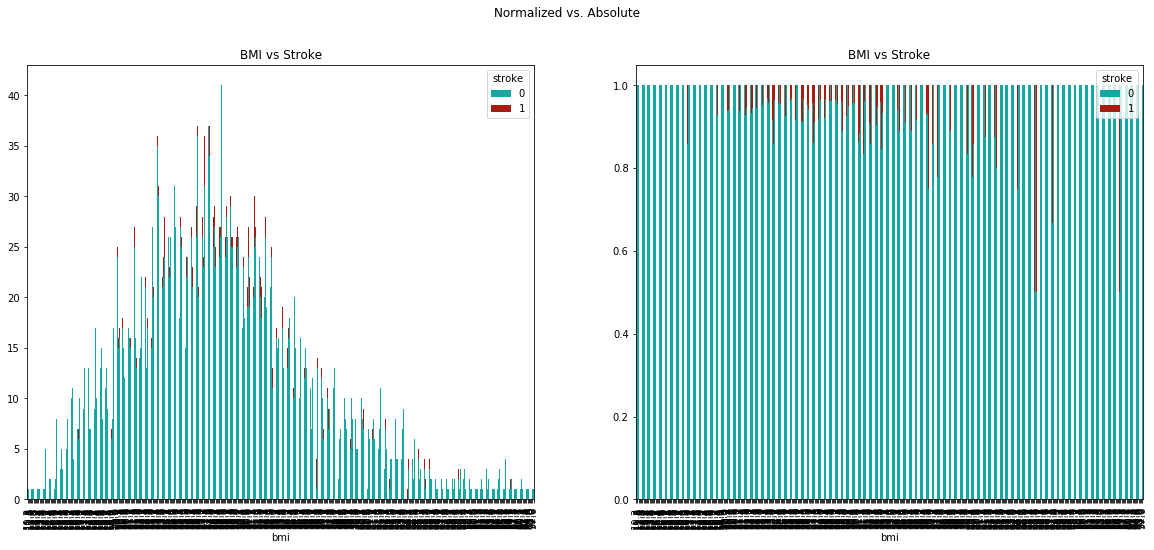

In [34]:
# Plotting bmi vs stroke

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(stroke_df.bmi, stroke_df.stroke)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='BMI vs Stroke', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='BMI vs Stroke', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

BMI is normally distributed, with higher BMI's having a higher correlation with stroke.

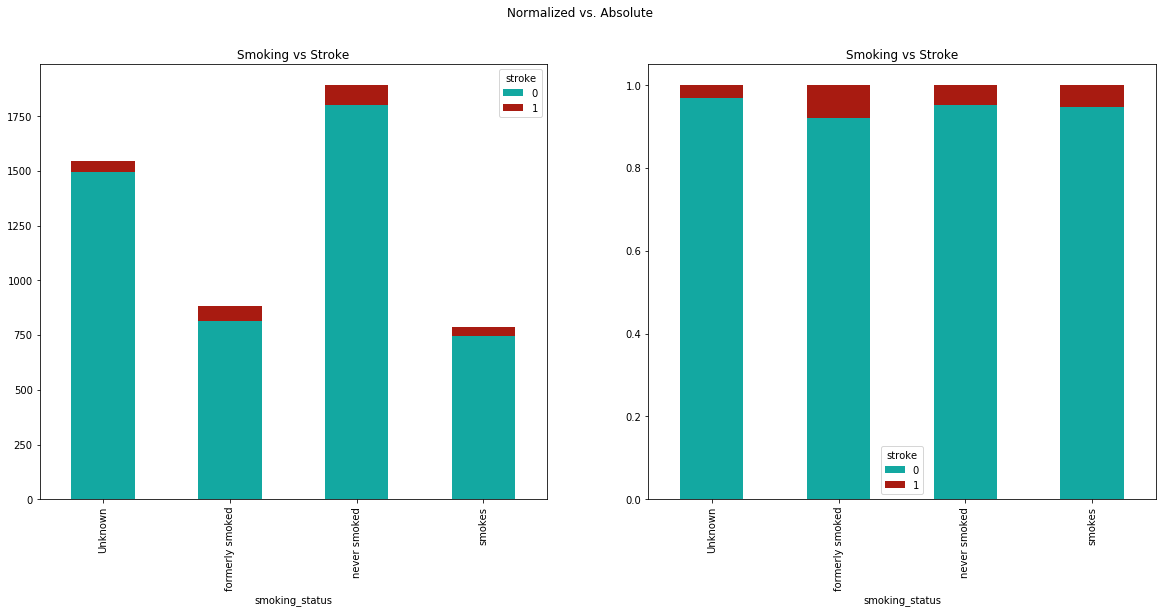

In [35]:
# Plotting smoking vs stroke

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(stroke_df.smoking_status, stroke_df.stroke)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Smoking vs Stroke', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Smoking vs Stroke', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Smoking previously seems to have the highest correlation with stroke, but there does not seem to be a significant difference.

In [36]:
stroke_df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


Age, hypertension, heart disease, and glucose have some correlation with stroke.

### Heart Disease Health Indicators Dataset

In [37]:
# Looking at the data features
heart_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


The data contains 21 features with the target "HeartDiseaseorAttack".

In [38]:
# Looking at the data distribution
heart_df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


There are 253,680 rows.

In [39]:
print(heart_df.dtypes)

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [40]:
# Finding null values
print(heart_df.isnull().sum())

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


(array([229787.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  23893.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

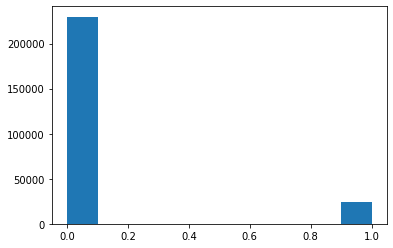

In [41]:
plt.hist(heart_df.HeartDiseaseorAttack)

The data is skewed with the majority not having heart disease.

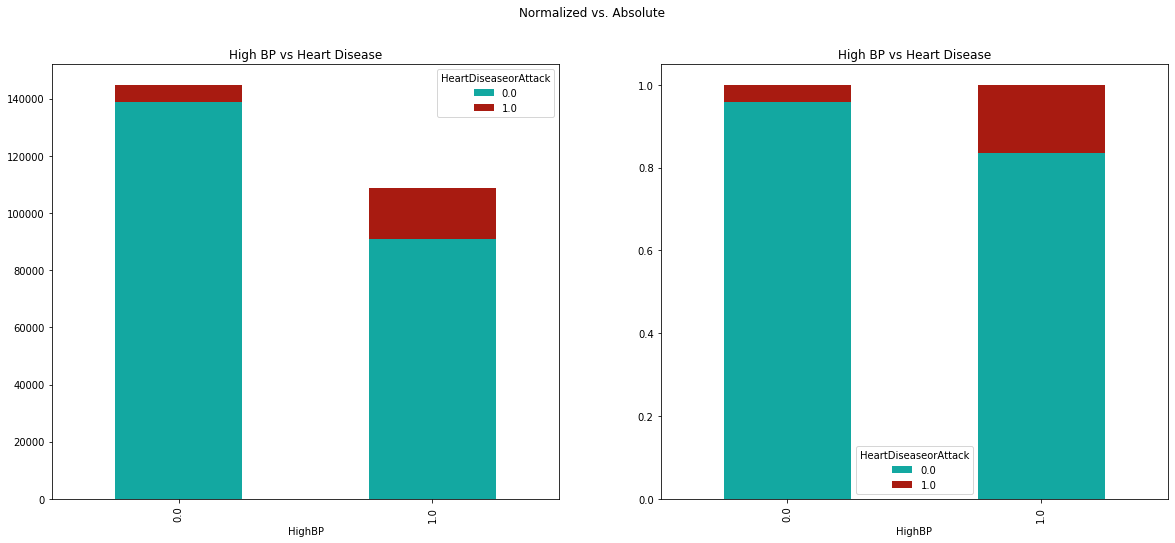

In [42]:
# Plotting BP vs heart disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.HighBP, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='High BP vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='High BP vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Most do not have high blood pressure, but it is correlated with heart disease.

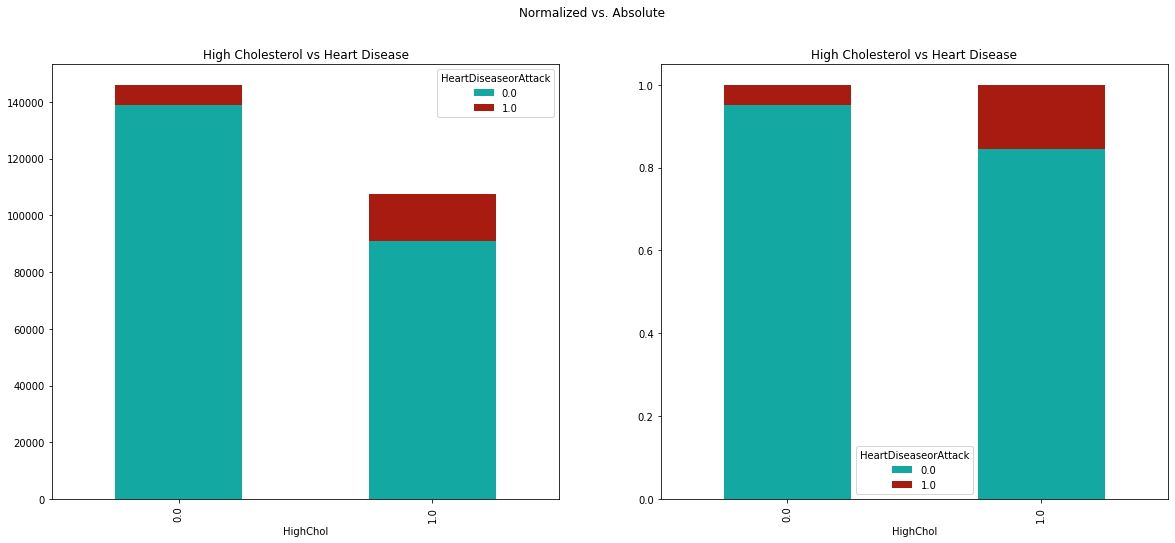

In [43]:
# Plotting Cholesterol vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.HighChol, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='High Cholesterol vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='High Cholesterol vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Most do not have high cholesterol, but it heart disease is correlated with high cholesterol.

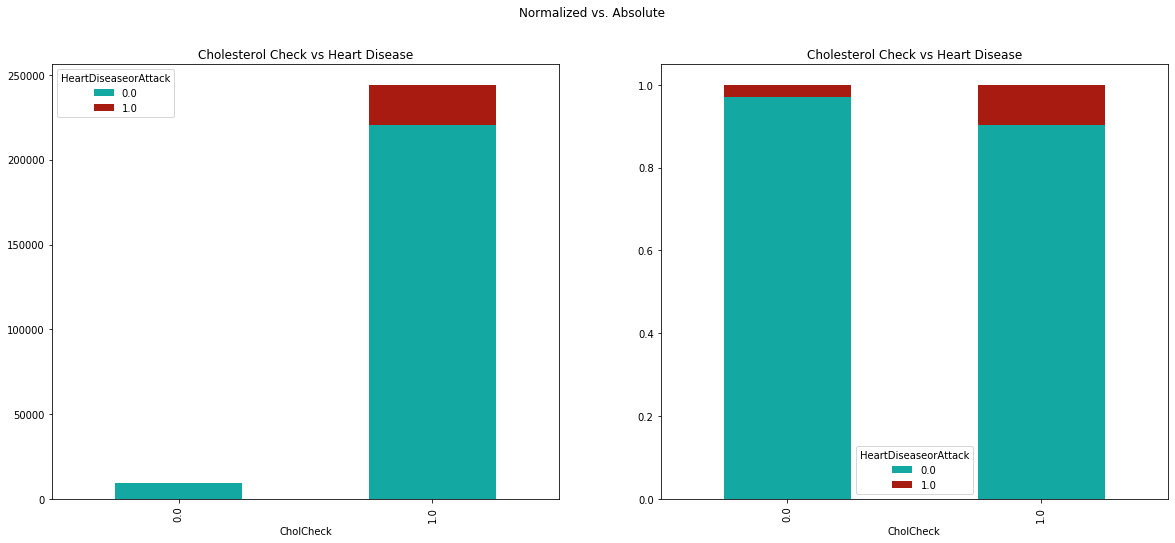

In [44]:
# Plotting Checked Cholesterol vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.CholCheck, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Cholesterol Check vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Cholesterol Check vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Most people have had their cholesterol checked, and those who do have it checked are more likely to have heart disease. This could also be because people at risk for heart disease or with heart disease may have more regular health screenings.

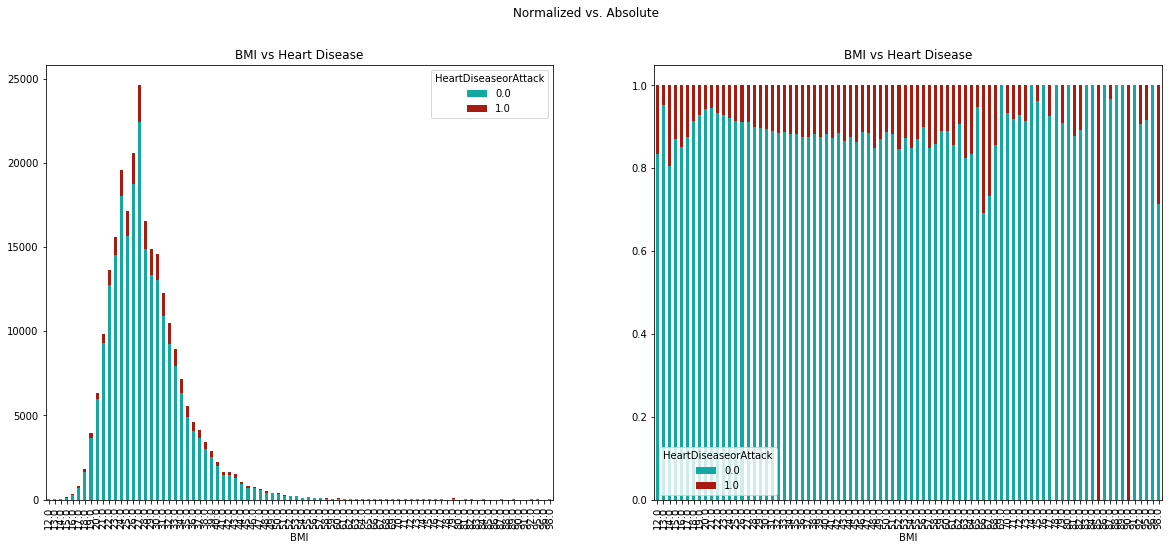

In [45]:
# Plotting BMI vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.BMI, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='BMI vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='BMI vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

BMI is relatively normally distributed, with a slightly higher risk of heart disease in the lower BMI's and higher BMI's, but there is higher variation in the higher BMIs due to the low sample sizes.

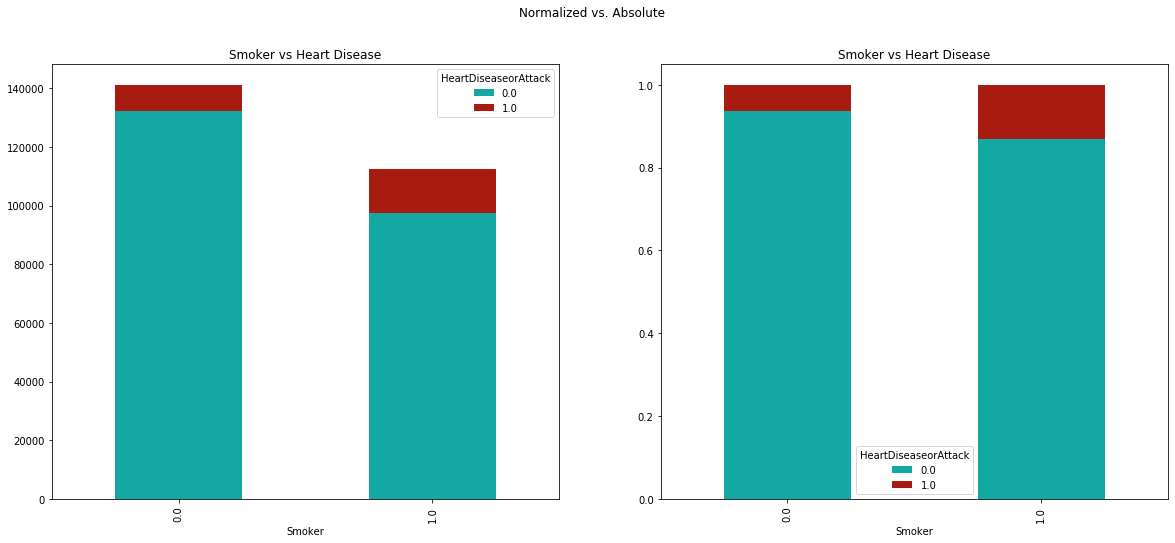

In [46]:
# Plotting Smoker vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.Smoker, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Smoker vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Smoker vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Smoking is split with less than half of the respondents smoking, but is correlated with higher risk of heart disease.

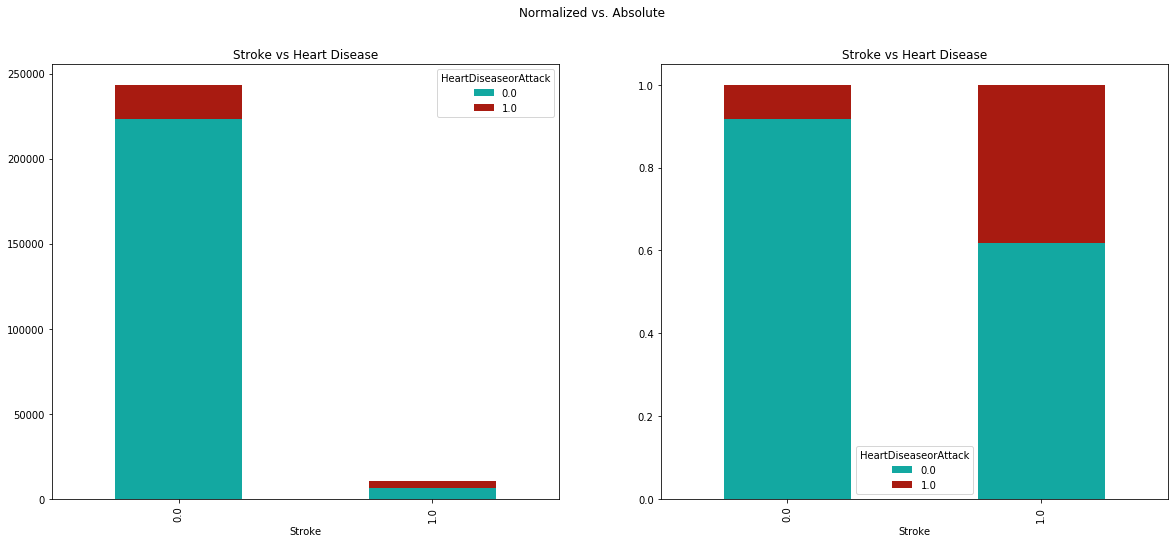

In [47]:
# Plotting Stroke vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.Stroke, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Stroke vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Stroke vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Stroke is correlated with heart disease and is a small portion of the data.

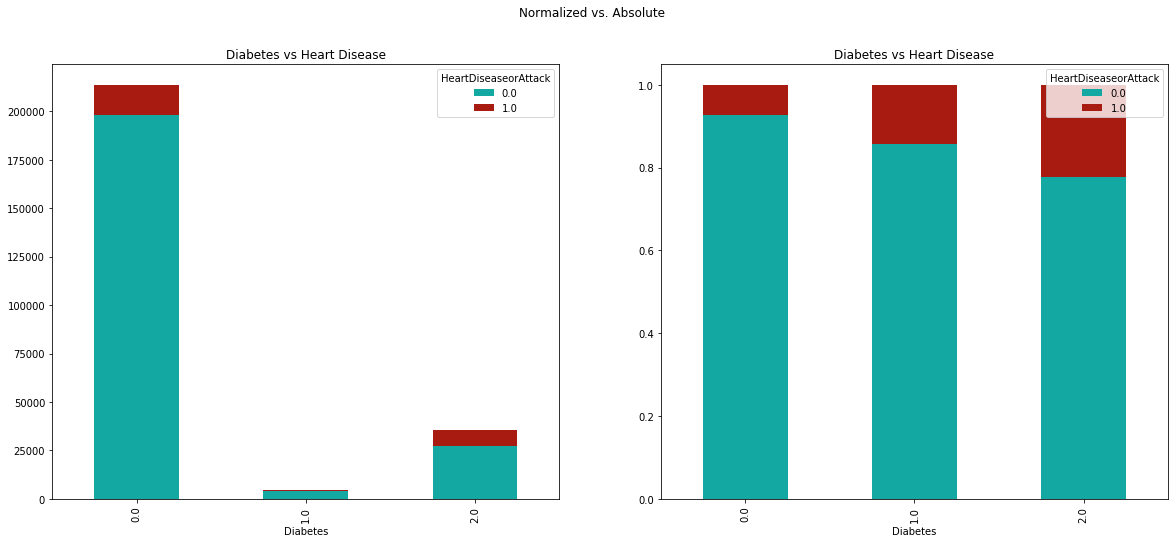

In [48]:
# Plotting Diabetes vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.Diabetes, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Diabetes vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Diabetes vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Type 2 diabetes is the most strongly correlated with heart disease and Type 1 is also correlated but does have a small sample size.

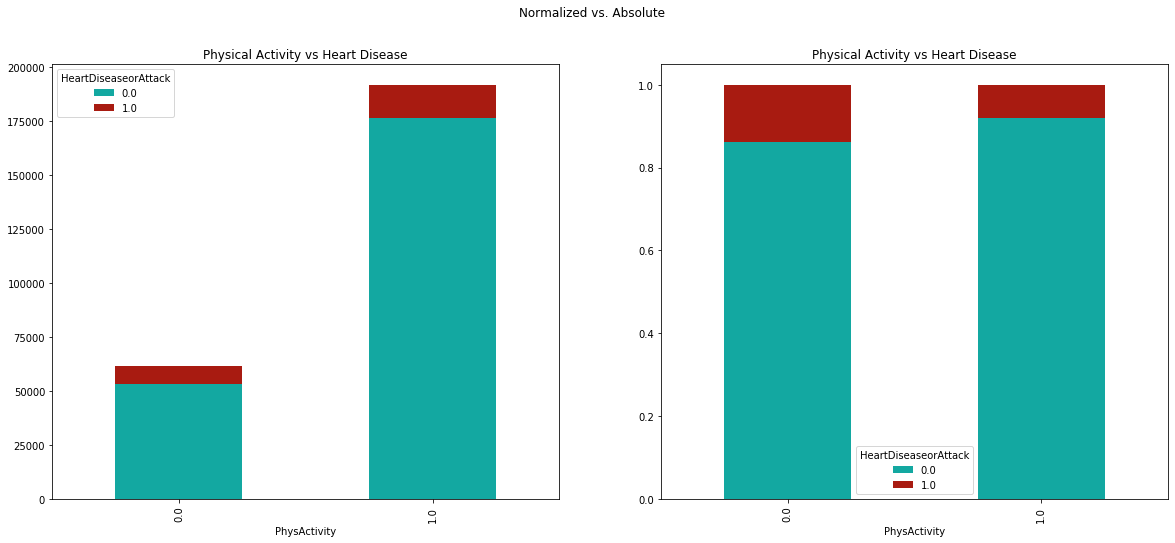

In [49]:
# Plotting Physical Activity vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.PhysActivity, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Physical Activity vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Physical Activity vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Lack of physical activity does seem to correlate with heart disease, but most did report physical activity.

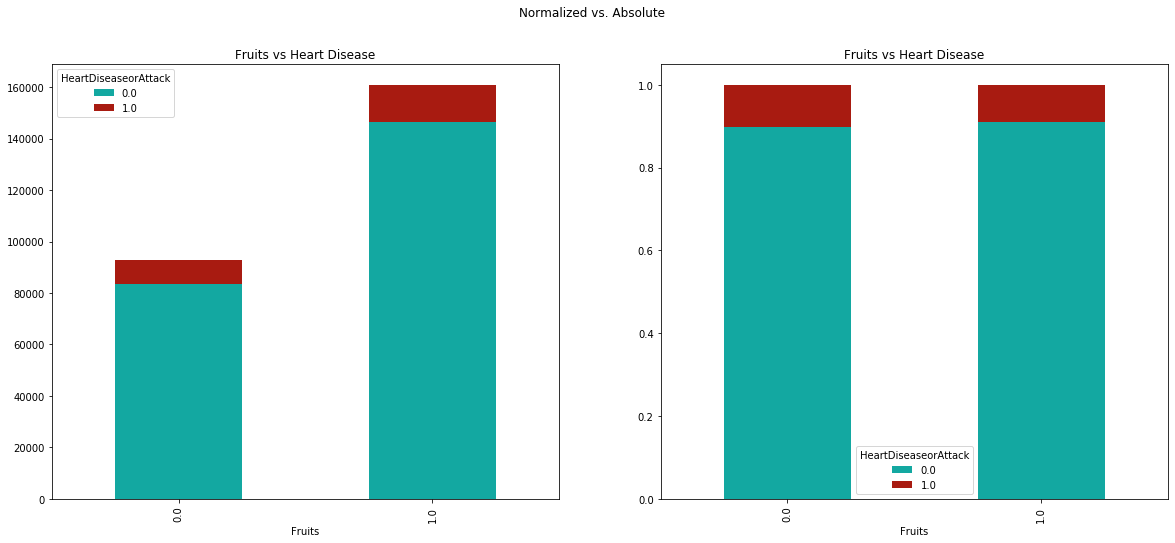

In [50]:
# Plotting Fruits vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.Fruits, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Fruits vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Fruits vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

A bit more than half seem to report eating fruit daily, but it does not seem correlated with heart disease.

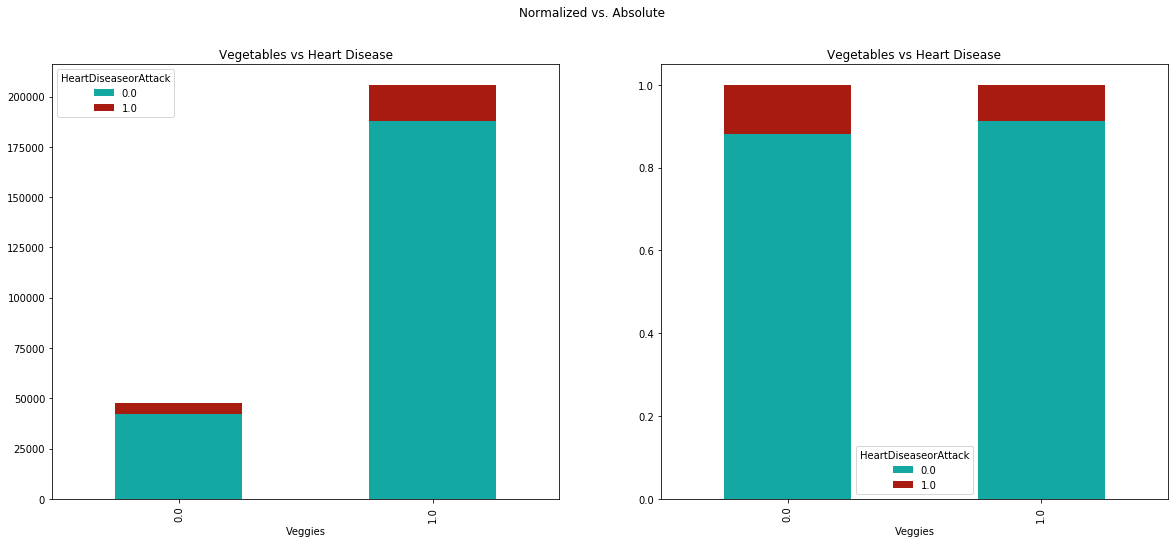

In [51]:
# Plotting Vegetables vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.Veggies, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Vegetables vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Vegetables vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Eating vegetables daily does not seem correlated with heart disease and most do report eating vegetables daily.

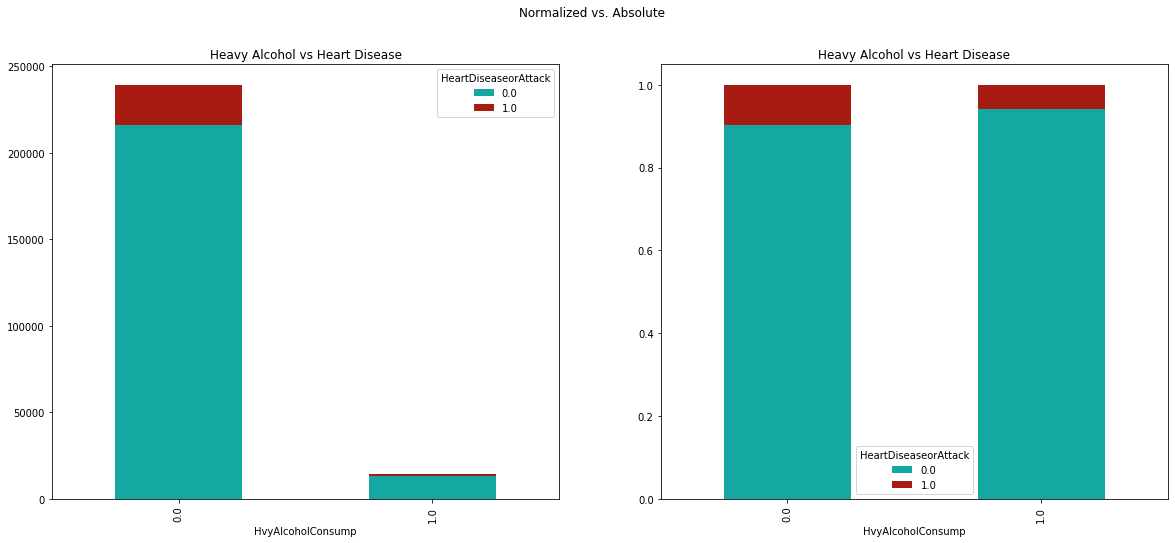

In [52]:
# Plotting Heavy Alcohol vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.HvyAlcoholConsump, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Heavy Alcohol vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Heavy Alcohol vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Heavy Alcohol over 14 drinks a week does not seem to be correlated with heart disease--as this is also self-reported, accuracy may not be there.

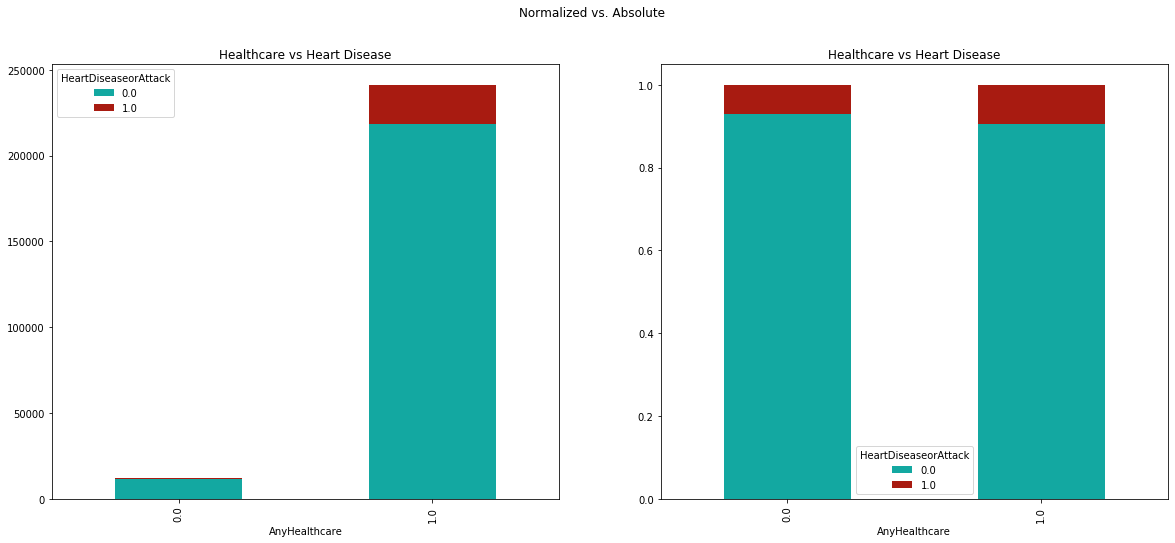

In [53]:
# Plotting Healthcare vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.AnyHealthcare, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Healthcare vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Healthcare vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Increased healthcare may lead to the discovery of heart disease more often than if there is no healthcare or people with health issues may visit the doctor more, but causation is hard to determine concretely.

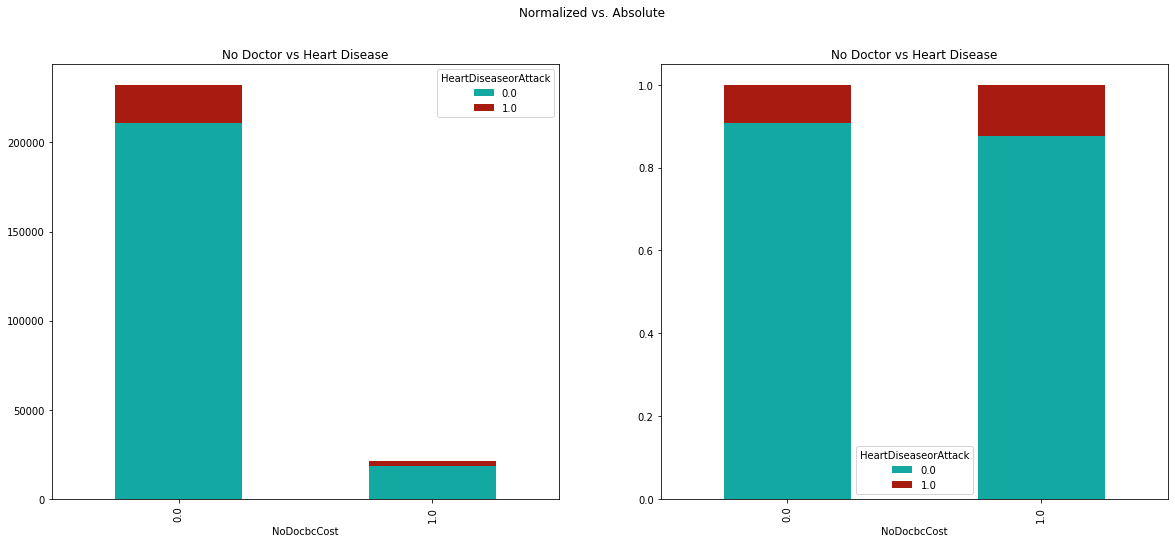

In [54]:
# Plotting No Doctor vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.NoDocbcCost, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='No Doctor vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='No Doctor vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

A smaller proportion of people do not have a doctor due to cost, but poverty may be a risk factor for heart disease.

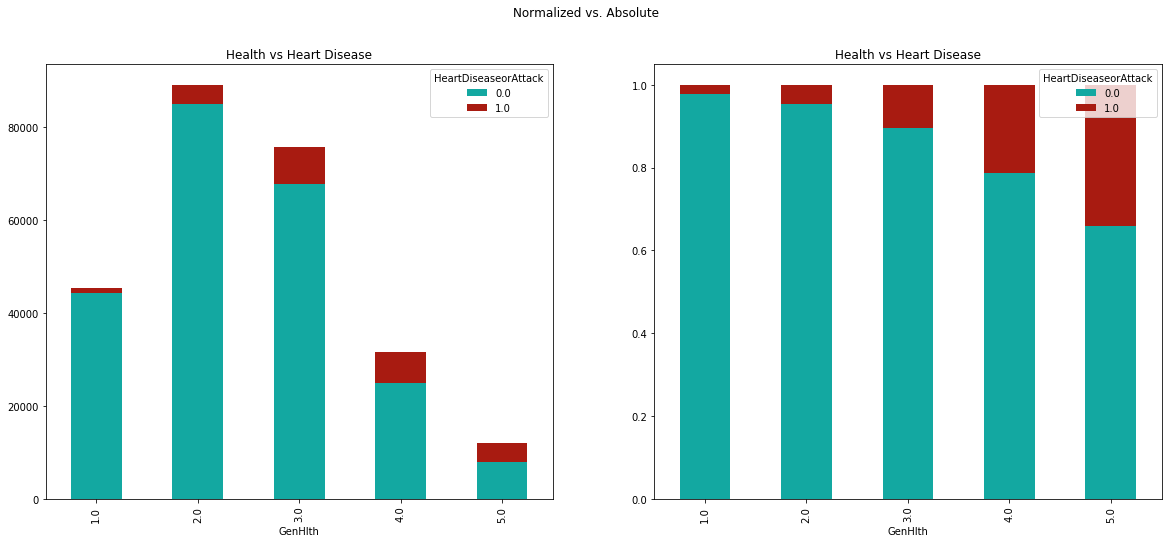

In [55]:
# Plotting Health vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.GenHlth, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Health vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Health vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

It appears 1 is good health and 5 is bad health, and health that is average to bad would likely have a higher risk of heart disease, or people with heart disease would classify their health as bad.

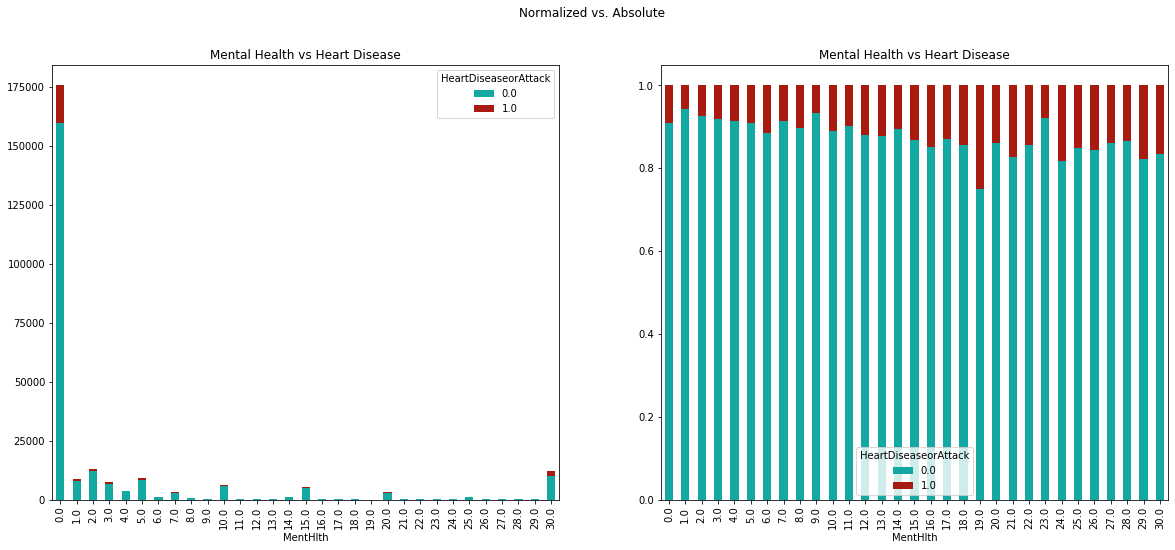

In [56]:
# Plotting Mental Health vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.MentHlth, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Mental Health vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Mental Health vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

The number of days mental health was not good seems to to correlate with heart disease and people tend to either report no bad mental health days or all bad mental health days, with the rest of the people reporting usually a week or less of bad days.

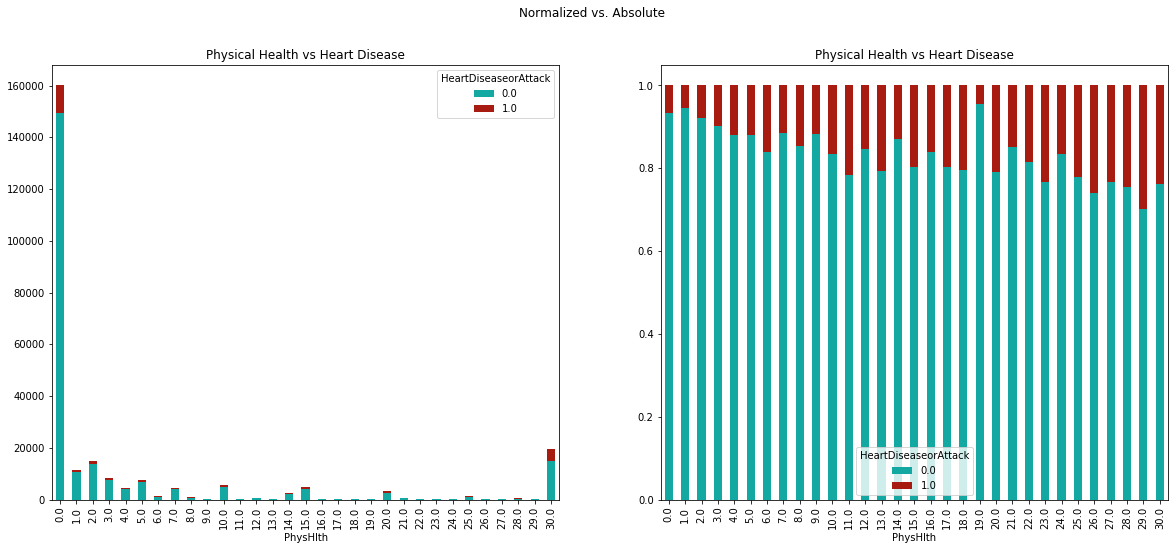

In [57]:
# Plotting Physical Health vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.PhysHlth, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Physical Health vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Physical Health vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Trends are similar to the mental health, with worse phsyical health correlating with a higher likelihood of heart disease and answers generally polarized

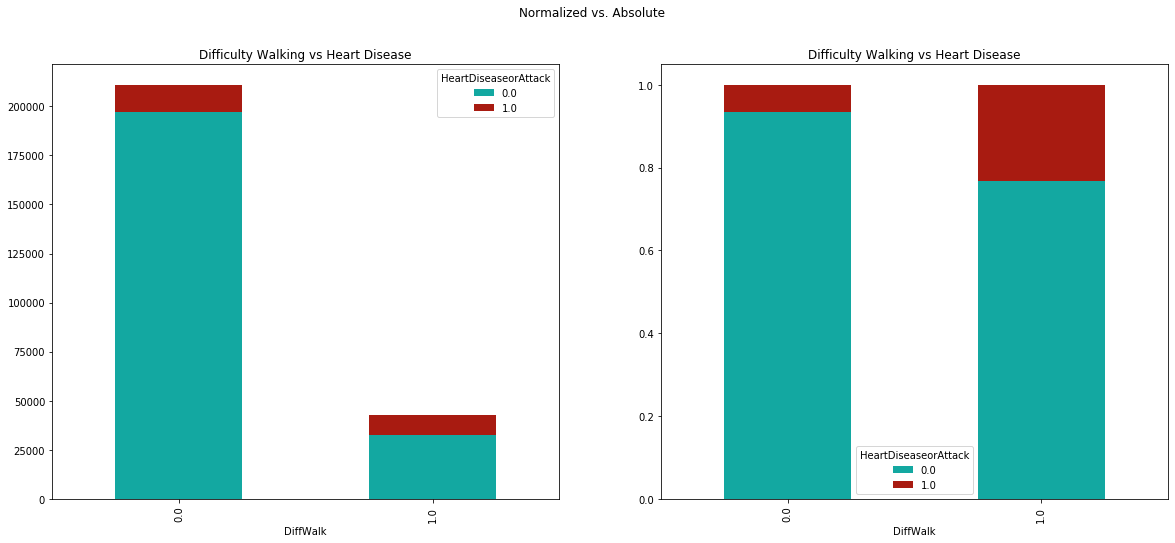

In [58]:
# Plotting Difficulty Walking vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.DiffWalk, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Difficulty Walking vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Difficulty Walking vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

If someone has difficulty walking, exercise is likely impacted which can increase risk of heart disease. Difficulty walking isn't specified as to whether it is chronic or short term, so it does lack important background information.

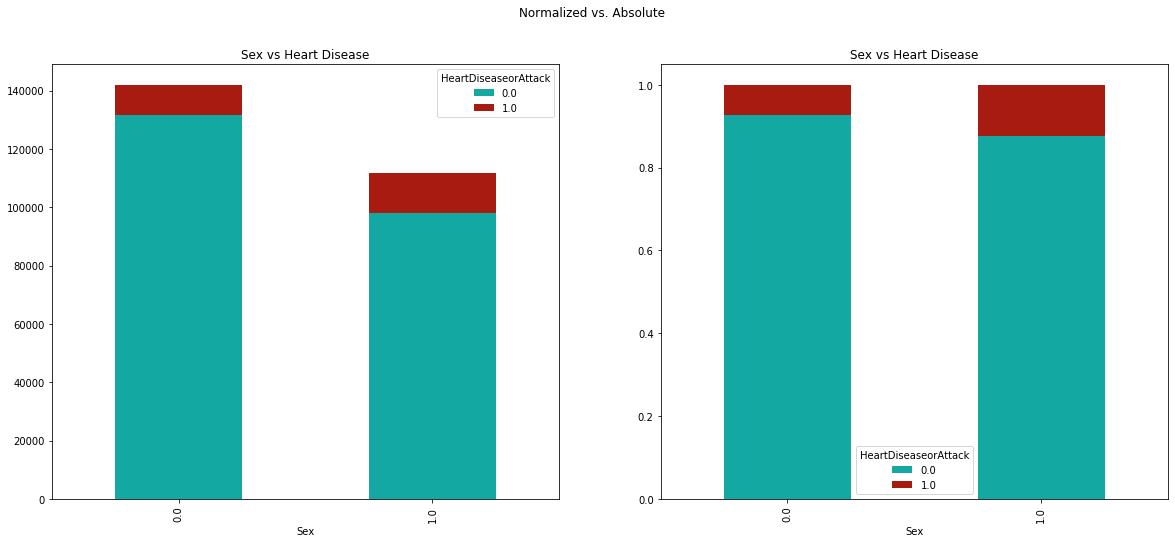

In [59]:
# Plotting Sex vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.Sex, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Sex vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Sex vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

There are more female respondents, but male respondents are more likely to have heart disease.

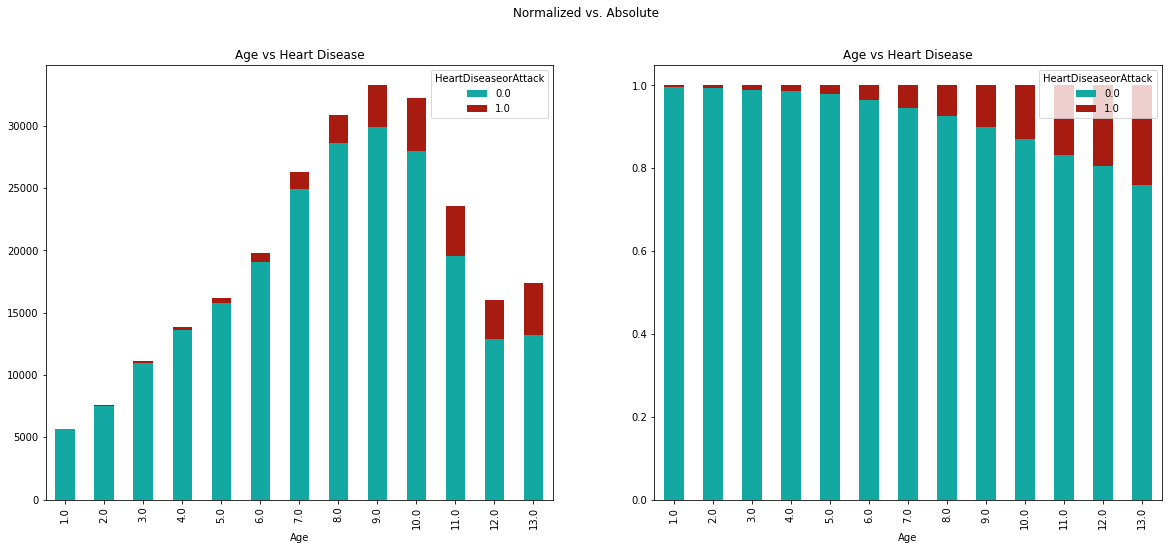

In [60]:
# Plotting Age vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.Age, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Age vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Age vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Starting at age 14, groups of 5 years are indicated. Age groups can be renamed for better clarity, but generally heart disease is correlated with higher age.

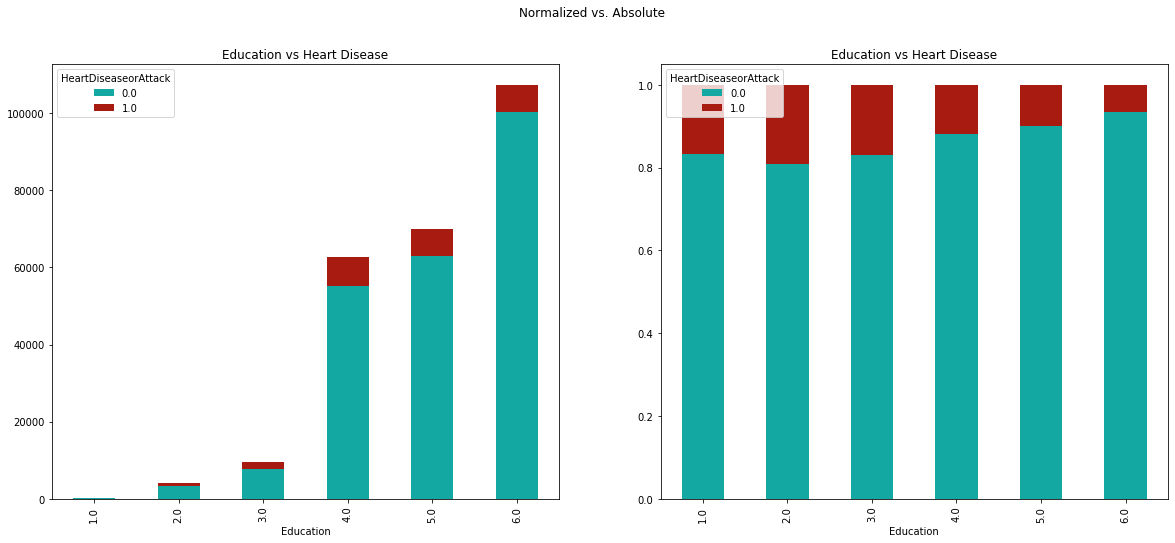

In [61]:
# Plotting Education vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.Education, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Education vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Education vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Higher education levels are correlated with less risk of heart disease. Education about health or career could impact risks of heart disease, but it is hard to tell what factors are influencing it the most.

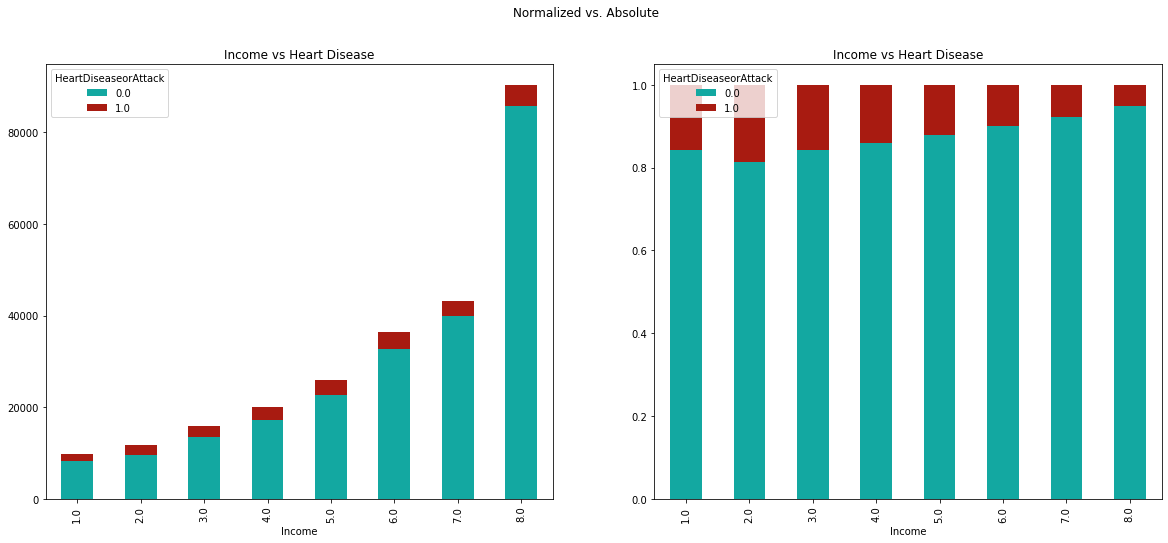

In [62]:
# Plotting Income vs Heart Disease

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Normalized vs. Absolute')

crosstab1 = pd.crosstab(heart_df.Income, heart_df.HeartDiseaseorAttack)
plot1 = crosstab1.plot(kind='bar', stacked=True, title='Income vs Heart Disease', ax = ax1, color = ['#13a8a1', '#a81b11'])
crosstab1norm = crosstab1.div(crosstab1.sum(1), axis = 0)
plot2 = crosstab1norm.plot(kind='bar', stacked=True, title='Income vs Heart Disease', ax = ax2, color = ['#13a8a1', '#a81b11'])
plt.show()

Higher income is correlated with lower risk of heart disease. Education or access to different diets or healthcare may be underlying factors influenced by income.

In [63]:
heart_df.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


The highest factors correlated with Heart Disease or Attack are High Blood Pressure, High Cholesterol, STroke, Diabetes, General Health, Physical Health, Difficulty Walking, and Age. As some of these are self-reported, they may not be the most accurate ways to assess risk of heart disease or attack and may also be symptoms of heart disease. 

### Balance the heart_df data for modeling:

##### Balance the heart_df by over-sampling, as overfitting is ok due to the sensitivity of needing to identify at risk patients. 

In [64]:
heart_df.shape

(253680, 22)

In [65]:
#count the male/female respondents within the data frame
heart_df['Sex'].value_counts()

0.0    141974
1.0    111706
Name: Sex, dtype: int64

In [66]:
#store the count of male/female
female_count, male_count = heart_df['Sex'].value_counts()

#assign df with only male and female records
female_heart = heart_df[heart_df['Sex'] == 0]
male_heart = heart_df[heart_df['Sex'] == 1] 

In [67]:
print('female' , female_heart.shape)

female (141974, 22)


In [68]:
print('male' , male_heart.shape)

male (111706, 22)


total male and female: 0.0    141974
1.0    141974
Name: Sex, dtype: int64


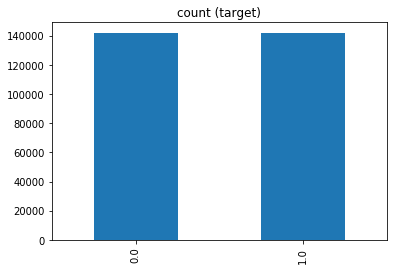

In [69]:
#create the over-sampled male variable 
male_over = male_heart.sample(female_count, replace=True)

#create the balanced data frame 
heart_balance = pd.concat([male_over, female_heart], axis=0)

print("total male and female:",heart_balance['Sex'].value_counts())

# plot the count after under-sampeling for accuracy
heart_balance['Sex'].value_counts().plot(kind='bar', title='count (target)')

In [70]:
heart_balance.shape

(283948, 22)

In [71]:
heart_balance.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
35921,0.0,1.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,5.0,5.0
120039,0.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,6.0,7.0
34180,0.0,1.0,1.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,1.0,1.0,0.0,1.0,6.0,5.0,5.0
103143,1.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,5.0,4.0
44342,0.0,0.0,1.0,1.0,33.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,5.0,8.0


### Balance the cardio_df data for modeling:

In [72]:
cardio_df.shape

(70000, 13)

In [73]:
cardio_df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1


In [74]:
#count the male and female respondents within the dataframe - nearly double more for female
cardio_df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [75]:
#store the count of male/female records
female_count_cardio, male_count_cardio = cardio_df['gender'].value_counts()

#assign df with only male and female records
female_cardio = cardio_df[cardio_df['gender'] == 1]
male_cardio = cardio_df[cardio_df['gender'] == 2]

In [76]:
print('female' , female_cardio.shape)

female (45530, 13)


In [77]:
print('male', male_cardio.shape)

male (24470, 13)


total male and female: 2    45530
1    45530
Name: gender, dtype: int64


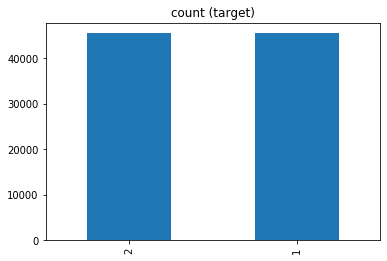

In [78]:
#create the over-sampled male variable 
male_over_cardio = male_cardio.sample(female_count_cardio, replace=True)

#create the balanced data frame 
cardio_balance = pd.concat([male_over_cardio, female_cardio], axis=0)

print("total male and female:",cardio_balance['gender'].value_counts())

# plot the count after under-sampeling for accuracy
cardio_balance['gender'].value_counts().plot(kind='bar', title='count (target)')

### Balance the stroke_df for modeling

In [79]:
stroke_df.shape

(5110, 12)

In [80]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [81]:
#count the male and female respondents within the dataframe - nearly 800 (33%) more records
stroke_df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [82]:
#store the count of male/female records
female_count_stroke, male_count_stroke, other_count_stroke = stroke_df['gender'].value_counts()

#assign df with only male and female records -- will not bring in "other" into dataset due to ambiguity
female_stroke = stroke_df[stroke_df['gender'] == 'Female']
male_stroke = stroke_df[stroke_df['gender'] == 'Male']

In [83]:
print('female' , female_stroke.shape)

female (2994, 12)


In [84]:
print('male' , male_stroke.shape)

male (2115, 12)


total male and female: Male      2994
Female    2994
Name: gender, dtype: int64


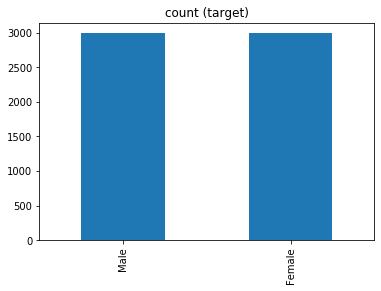

In [85]:
#create the over-sampled male variable 
male_over_stroke = male_stroke.sample(female_count_stroke, replace=True)

#create the balanced data frame 
stroke_balance = pd.concat([male_over_stroke, female_stroke], axis=0)

print("total male and female:",stroke_balance['gender'].value_counts())

# plot the count after under-sampeling for accuracy
stroke_balance['gender'].value_counts().plot(kind='bar', title='count (target)')

### View balanced datasets

In [86]:
heart_balance.head(2)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
35921,0.0,1.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,5.0,5.0
120039,0.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,6.0,7.0


In [87]:
cardio_balance.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
42677,60978,54,2,174,79.0,120,80,3,3,0,0,0,0
26363,37661,51,2,170,77.0,140,90,1,1,1,1,1,1


In [88]:
stroke_balance.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
619,35565,Male,43.00,0,0,Yes,Private,Urban,111.43,21.9,smokes,0
4303,24972,Male,1.48,0,0,No,children,Rural,112.02,20.9,Unknown,0


### View and drop NULL values from dataframes

In [89]:
heart_balance.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [90]:
cardio_balance.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [91]:
stroke_balance.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  238
smoking_status         0
stroke                 0
dtype: int64

In [92]:
stroke_balance = stroke_balance.dropna()

In [93]:
stroke_balance.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Transform catigorical varialbes for stroke_balance dataset

In [94]:
stroke_clean_cat = stroke_balance

In [95]:
stroke_clean_cat['smoking_status'].unique()

array(['smokes', 'Unknown', 'never smoked', 'formerly smoked'],
      dtype=object)

In [96]:
stroke_clean_cat['gender'].replace(['Male','Female'],[0,1], inplace=True)
stroke_clean_cat['ever_married'].replace(['Yes','No'],[1,0], inplace=True) 
stroke_clean_cat['work_type'].replace(['Govt_job','Self-employed','Private','children','Never_worked'],[0,1,2,3,4], inplace = True)
stroke_clean_cat['Residence_type'].replace(['Urban','Rural'],[0,1], inplace = True)
stroke_clean_cat['smoking_status'].replace(['never smoked','formerly smoked', 'Unknown','smokes'],[0,1,2,3],inplace=True)

In [97]:
stroke_balance_final = stroke_clean_cat

In [98]:
stroke_balance_final.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
619,35565,0,43.00,0,0,1,2,0,111.43,21.9,3,0
4303,24972,0,1.48,0,0,0,3,1,112.02,20.9,2,0
1464,15987,0,13.00,0,0,0,3,0,92.65,31.7,0,0
242,45535,0,68.00,0,0,1,2,1,233.94,42.4,0,1
1595,2898,0,46.00,0,0,1,2,0,87.66,57.3,0,0


### Normalize the data for analysis 

In [99]:
#normalize the heart data 
heart_norm = (heart_balance - heart_balance.min())/(heart_balance.max() - heart_balance.min())
heart_norm.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
35921,0.0,1.0,0.0,1.0,0.139535,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,1.0,1.000000,0.8,0.571429
120039,0.0,1.0,0.0,1.0,0.209302,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,1.0,0.833333,1.0,0.857143
34180,0.0,1.0,1.0,1.0,0.232558,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.50,0.033333,0.033333,0.0,1.0,0.416667,0.8,0.571429
103143,1.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,1.0,0.750000,0.8,0.428571
44342,0.0,0.0,1.0,1.0,0.244186,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,1.0,0.833333,0.8,1.000000


In [100]:
#normalize the cardio data 
cardio_norm = (cardio_balance - cardio_balance.min())/(cardio_balance.max() - cardio_balance.min())
cardio_norm.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
42677,0.609782,0.714286,1.0,0.610256,0.363158,0.016698,0.013550,1.0,1.0,0.0,0.0,0.0,0.0
26363,0.376608,0.628571,1.0,0.589744,0.352632,0.017934,0.014453,0.0,0.0,1.0,1.0,1.0,1.0
40315,0.576202,0.885714,1.0,0.630769,0.489474,0.016698,0.013550,0.0,0.0,0.0,0.0,1.0,0.0
65285,0.931939,0.942857,1.0,0.584615,0.289474,0.016698,0.013550,0.0,0.0,0.0,0.0,1.0,0.0
14325,0.204624,0.628571,1.0,0.600000,0.436842,0.016079,0.013550,0.0,0.5,0.0,0.0,0.0,0.0


In [101]:
#delete the id from the cardio_norm df
del cardio_norm['id']

In [102]:
cardio_norm.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
42677,0.714286,1.0,0.610256,0.363158,0.016698,0.013550,1.0,1.0,0.0,0.0,0.0,0.0
26363,0.628571,1.0,0.589744,0.352632,0.017934,0.014453,0.0,0.0,1.0,1.0,1.0,1.0
40315,0.885714,1.0,0.630769,0.489474,0.016698,0.013550,0.0,0.0,0.0,0.0,1.0,0.0
65285,0.942857,1.0,0.584615,0.289474,0.016698,0.013550,0.0,0.0,0.0,0.0,1.0,0.0
14325,0.628571,1.0,0.600000,0.436842,0.016079,0.013550,0.0,0.5,0.0,0.0,0.0,0.0


In [103]:
#normalize the stroke data
stroke_norm = (stroke_balance - stroke_balance.min())/(stroke_balance.max()-stroke_balance.min())
stroke_norm.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
619,0.487051,0.0,0.523926,0.0,0.0,1.0,0.50,0.0,0.259948,0.132875,1.000000,0.0
4303,0.341669,0.0,0.017090,0.0,0.0,0.0,0.75,1.0,0.262672,0.121420,0.666667,0.0
1464,0.218355,0.0,0.157715,0.0,0.0,0.0,0.75,0.0,0.173253,0.245132,0.000000,0.0
242,0.623883,0.0,0.829102,0.0,0.0,1.0,0.50,1.0,0.825501,0.367698,0.000000,1.0
1595,0.038716,0.0,0.560547,0.0,0.0,1.0,0.50,0.0,0.150217,0.538373,0.000000,0.0


In [104]:
#delete the id column from the stroke_norm df
del stroke_norm['id']

In [105]:
stroke_norm.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
619,0.0,0.523926,0.0,0.0,1.0,0.50,0.0,0.259948,0.132875,1.000000,0.0
4303,0.0,0.017090,0.0,0.0,0.0,0.75,1.0,0.262672,0.121420,0.666667,0.0
1464,0.0,0.157715,0.0,0.0,0.0,0.75,0.0,0.173253,0.245132,0.000000,0.0
242,0.0,0.829102,0.0,0.0,1.0,0.50,1.0,0.825501,0.367698,0.000000,1.0
1595,0.0,0.560547,0.0,0.0,1.0,0.50,0.0,0.150217,0.538373,0.000000,0.0


In [106]:
stroke_norm.isnull().values.sum()

0

### Split the 3 normalized dataframes into Trainign and Testing data

In [107]:
from sklearn.model_selection import train_test_split

#split the data into training and testing dataframes
training_heart, testing_heart = train_test_split(heart_norm, test_size=0.2, random_state=25)
training_cardio, testing_cardio = train_test_split(cardio_norm, test_size=0.2, random_state=25)
training_stroke, testing_stroke = train_test_split(stroke_norm, test_size=0.2, random_state=25)

In [108]:
#print the number of records within each training and testing dataframe 
print(f"No. of heart training examples: {training_heart.shape[0]}")
print(f"No. of heart test examples: {testing_heart.shape[0]}")
print(f"No. of cardio training examples: {training_cardio.shape[0]}")
print(f"No. of cardio test examples: {testing_cardio.shape[0]}")
print(f"No. of stroke training examples: {training_stroke.shape[0]}")
print(f"No. of stroke test examples: {testing_stroke.shape[0]}")

No. of heart training examples: 227158
No. of heart test examples: 56790
No. of cardio training examples: 72848
No. of cardio test examples: 18212
No. of stroke training examples: 4600
No. of stroke test examples: 1150
